#### Import 

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', 100)
#DataTable.max_columns = 1000
import warnings
warnings.filterwarnings("ignore")

In [97]:
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.nonparametric.kde import KDEUnivariate
import plotly.figure_factory as ff

In [98]:
#from google.colab import drive
#drive.mount('/content/drive')

## Import data

In [99]:
url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv'

df = pd.read_csv(url)

## Data Description and Wrangling

In [100]:
print('The shape of our dataset is {}.'.format(df.shape))
print('Displaying the first 5 entries')
df.head()

The shape of our dataset is (202760, 56).
Displaying the first 5 entries


CountryName CountryCode  RegionName  RegionCode Jurisdiction      Date  \
0       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200101   
1       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200102   
2       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200103   
3       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200104   
4       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200105   

   C1M_School closing  C1M_Flag  C2M_Workplace closing  C2M_Flag  \
0                 0.0       NaN                    0.0       NaN   
1                 0.0       NaN                    0.0       NaN   
2                 0.0       NaN                    0.0       NaN   
3                 0.0       NaN                    0.0       NaN   
4                 0.0       NaN                    0.0       NaN   

   C3M_Cancel public events  C3M_Flag  C4M_Restrictions on gatherings  \
0                       0.0       NaN                             0.0   
1                       0.0       NaN                             0.0   
2                       0.0       NaN                             0.0   
3                       0.0       NaN                             0.0   
4                       0.0       NaN                             0.0   

   C4M_Flag  C5M_Close public transport  C5M_Flag  \
0       NaN                         0.0       NaN   
1       NaN                         0.0       NaN   
2       NaN                         0.0       NaN   
3       NaN                         0.0       NaN   
4       NaN                         0.0       NaN   

   C6M_Stay at home requirements  C6M_Flag  \
0                            0.0       NaN   
1                            0.0       NaN   
2                            0.0       NaN   
3                            0.0       NaN   
4                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       N

##### View the output of df.head() in a tabular format.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 



*   Columns 'RegionName' and 'RegionCode' will be dropped since they contain 0 non-null entries.
*  Column 'CountryCode' is dropped to avoid redundancy.



In [102]:
df = df.drop(columns=['RegionName','RegionCode','CountryName'])
print(df.shape)

(202760, 53)


#### Converting 'Date' to datetime.

In [103]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [104]:
start_date = df['Date'].min()
end_date = df['Date'].max()
print("Start Date: {}, End Date: {}".format(start_date,end_date))

Start Date: 2020-01-01 00:00:00, End Date: 2022-12-31 00:00:00


In [105]:
# Select columns by data type, excluding datetime columns
non_datetime_columns = df.select_dtypes(exclude=['datetime64[ns]']).columns

# Applying value_counts to display the unique_values and their frequency.
values_of_each_column = {col: df[col].value_counts(dropna=False) for col in non_datetime_columns}

values_of_each_column

{'CountryCode': CountryCode
 ABW    1096
 PAK    1096
 NAM    1096
 NER    1096
 NGA    1096
        ... 
 GMB    1096
 GRC    1096
 GRL    1096
 GTM    1096
 ZWE    1096
 Name: count, Length: 185, dtype: int64,
 'Jurisdiction': Jurisdiction
 NAT_TOTAL    202760
 Name: count, dtype: int64,
 'C1M_School closing': C1M_School closing
 0.0    74497
 1.0    55839
 3.0    41246
 2.0    31178
 Name: count, dtype: int64,
 'C1M_Flag': C1M_Flag
 1.0    107134
 NaN     74497
 0.0     21129
 Name: count, dtype: int64,
 'C2M_Workplace closing': C2M_Workplace closing
 0.0    68936
 2.0    64722
 1.0    51824
 3.0    17278
 Name: count, dtype: int64,
 'C2M_Flag': C2M_Flag
 1.0    106742
 NaN     68936
 0.0     27082
 Name: count, dtype: int64,
 'C3M_Cancel public events': C3M_Cancel public events
 2.0    85119
 0.0    64184
 1.0    53457
 Name: count, dtype: int64,
 'C3M_Flag': C3M_Flag
 1.0    119017
 NaN     64184
 0.0     19559
 Name: count, dtype: int64,
 'C4M_Restrictions on gatherings': C4M_Res


*   We've 1096 entries for each country, having a total of 185 countries represented in this dataset.
*   Dropping 'Jurisdiction' since it has only one unique value.



In [106]:
df = df.drop(columns=['Jurisdiction'])
print(df.shape)

(202760, 52)


#### Converting object dtypes to categorical

Useful for plotting V2B, V2C and Majority Vaccinated.

In [107]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [108]:
df.dtypes

CountryCode                                                                              category
Date                                                                               datetime64[ns]
C1M_School closing                                                                        float64
C1M_Flag                                                                                  float64
C2M_Workplace closing                                                                     float64
C2M_Flag                                                                                  float64
C3M_Cancel public events                                                                  float64
C3M_Flag                                                                                  float64
C4M_Restrictions on gatherings                                                            float64
C4M_Flag                                                                                  float64
C5M_Close public tra


### Renaming columns

In [109]:

df.columns = [col.split('_')[0] if ' ' in col else col for col in df.columns]
df.head(1)

CountryCode       Date  C1M  C1M_Flag  C2M  C2M_Flag  C3M  C3M_Flag  C4M  \
0         ABW 2020-01-01  0.0       NaN  0.0       NaN  0.0       NaN  0.0   

   C4M_Flag  C5M  C5M_Flag  C6M  C6M_Flag  C7M  C7M_Flag  C8EV   E1  E1_Flag  \
0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0      NaN   

    E2   E3   E4   H1  H1_Flag   H2   H3   H4   H5  H6M  H6M_Flag   H7  \
0  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0       NaN  0.0   

   H7_Flag  H8M  H8M_Flag  V1  V2A  V2B  V2C  V2D  V2E_Education  V2F  V2G  \
0      NaN  0.0       NaN   0    0  NaN  NaN  NaN            NaN  NaN  NaN   

   V3  V4  ConfirmedCases  ConfirmedDeaths MajorityVaccinated  \
0   0 NaN             0.0              0.0                 NV   

   PopulationVaccinated  StringencyIndex_Average  \
0                   0.0                      0.0   

   GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
0                              0.0                             0.0   

   EconomicSupportIndex  
0                   0.0

### Dealing With Missing Values

In [110]:
na_values = df.isna().sum()

In [111]:
fig = go.Figure(layout=go.Layout(
        autosize=False,
        width=800,
        height=800
    ))
fig.add_trace(go.Bar(
    y = na_values.index,
    x = na_values.values,
    customdata = na_values.values,
    orientation='h'
))

fig.update_layout(
    title='Number of missing values in each column',
    xaxis_title='Missing values',
    yaxis_title='Columns',
    hovermode='closest',
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(len(na_values.index))),
        ticktext=na_values.index
    )
)

fig.show()

#### Drop entries where 'ConfirmedCases' and 'ConfirmedDeaths' are NaNs

In [112]:
df_ccd = df

df = df.dropna(subset=['ConfirmedCases', 'ConfirmedDeaths'])
print(df.shape)

(201664, 52)


In [113]:
whichCountry = set(df_ccd['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountry)

{'TKM'}


##### No data on confirmed cases and deaths for Turkmenistan.

#### Drop 'MajorityVaccinated' and 'PopulationVaccinated'.

In [114]:
#df_vacc = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
df_vc = df

In [115]:
df = df.dropna(subset=['MajorityVaccinated', 'PopulationVaccinated'])
print(df.shape)

(200568, 52)


In [116]:
df_vc.shape[0] - df.shape[0]

1096

In [117]:
whichCountry = set(df_vc['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountry)

{'ERI'}


##### Eritrea's vaccination data is missing.

#### Removing duplicates

In [118]:
df = df.drop_duplicates()

#### Reset the index of our dataframe

In [119]:
df = df.reset_index(drop=True)

In [120]:
print(df.shape)

(200568, 52)


#### We didn't have any duplicate entries in the dataset.

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200568 entries, 0 to 200567
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   CountryCode                      200568 non-null  category      
 1   Date                             200568 non-null  datetime64[ns]
 2   C1M                              200568 non-null  float64       
 3   C1M_Flag                         126843 non-null  float64       
 4   C2M                              200568 non-null  float64       
 5   C2M_Flag                         132241 non-null  float64       
 6   C3M                              200568 non-null  float64       
 7   C3M_Flag                         136857 non-null  float64       
 8   C4M                              200568 non-null  float64       
 9   C4M_Flag                         124185 non-null  float64       
 10  C5M                              200568 non-

In [122]:
df

CountryCode       Date  C1M  C1M_Flag  C2M  C2M_Flag  C3M  C3M_Flag  \
0              ABW 2020-01-01  0.0       NaN  0.0       NaN  0.0       NaN   
1              ABW 2020-01-02  0.0       NaN  0.0       NaN  0.0       NaN   
2              ABW 2020-01-03  0.0       NaN  0.0       NaN  0.0       NaN   
3              ABW 2020-01-04  0.0       NaN  0.0       NaN  0.0       NaN   
4              ABW 2020-01-05  0.0       NaN  0.0       NaN  0.0       NaN   
...            ...        ...  ...       ...  ...       ...  ...       ...   
200563         ZWE 2022-12-27  1.0       1.0  2.0       1.0  1.0       1.0   
200564         ZWE 2022-12-28  1.0       1.0  2.0       1.0  1.0       1.0   
200565         ZWE 2022-12-29  1.0       1.0  2.0       1.0  1.0       1.0   
200566         ZWE 2022-12-30  1.0       1.0  2.0       1.0  1.0       1.0   
200567         ZWE 2022-12-31  1.0       1.0  2.0       1.0  1.0       1.0   

        C4M  C4M_Flag  C5M  C5M_Flag  C6M  C6M_Flag  C7M  C7M_Flag  C8EV   E1  \
0       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
1       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
2       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
3       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
4       0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0   
...     ...       ...  ...       ...  ...       ...  ...       ...   ...  ...   
200563  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
200564  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
200565  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
200566  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   
200567  0.0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   1.0  0.0   

        E1_Flag   E2   E3   E4   H1  H1_Flag   H2   H3   H4   H5  H6M  \
0           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
1           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
2           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
3           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
4           NaN  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0   
...         ...  ...  ...  ...  ...      ...  ...  ...  ...  ...  ...   
200563      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
200564      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
200565      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
200566      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   
200567      NaN  0.0  NaN  NaN  2.0      1.0  3.0  1.0  NaN  0.0  3.0   

        H6M_Flag   H7  H7_Flag  H8M  H8M_Flag  V1  V2A       V2B       V2C  \
0            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
1            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
2            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
3            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
4            NaN  0.0      NaN  0.0       NaN   0    0       NaN       NaN   
...          ...  ...      ...  ...       ...  ..  ...       ...       ...   
200563       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
200564       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
200565       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
200566       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   
200567       1.0  5.0      1.0  0.0       NaN   2    3  5-15 yrs  5-15 yrs   

        V2D  V2E_Education  V2F  V2G  V3   V4  ConfirmedCases  \
0       NaN            NaN  NaN  NaN   0  NaN             0.0   
1       NaN            NaN  NaN  NaN   0  NaN             0.0   
2       NaN            NaN  NaN  NaN   0  NaN             0.0   
3       NaN            

### Univariate Analysis
Conducted to examine the columns in an easier and visual way.

In [123]:
helper_df = pd.read_csv('helpers/output.csv')
helper_df['Column_Name'] = [col.split('_')[0] if ' ' in col else col for col in helper_df['Column_Name'].values]
helper_df['Column_Name'].values

array(['CountryName', 'Date', 'C1M', 'C1M_Flag', 'C2M', 'C2M_Flag', 'C3M',
       'C3M_Flag', 'C4M', 'C4M_Flag', 'C5M', 'C5M_Flag', 'C6M',
       'C6M_Flag', 'C7M', 'C7M_Flag', 'C8EV', 'E1', 'E1_Flag', 'E2', 'E3',
       'E4', 'H1', 'H1_Flag', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H6M_Flag',
       'H7', 'H7_Flag', 'H8M', 'H8M_Flag', 'V1', 'V2A', 'V2B', 'V2C',
       'V2D', 'V2E_Education', 'V2F', 'V2G', 'V3', 'V4', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average',
       'ContainmentHealthIndex_Average', 'EconomicSupportIndex'],
      dtype=object)

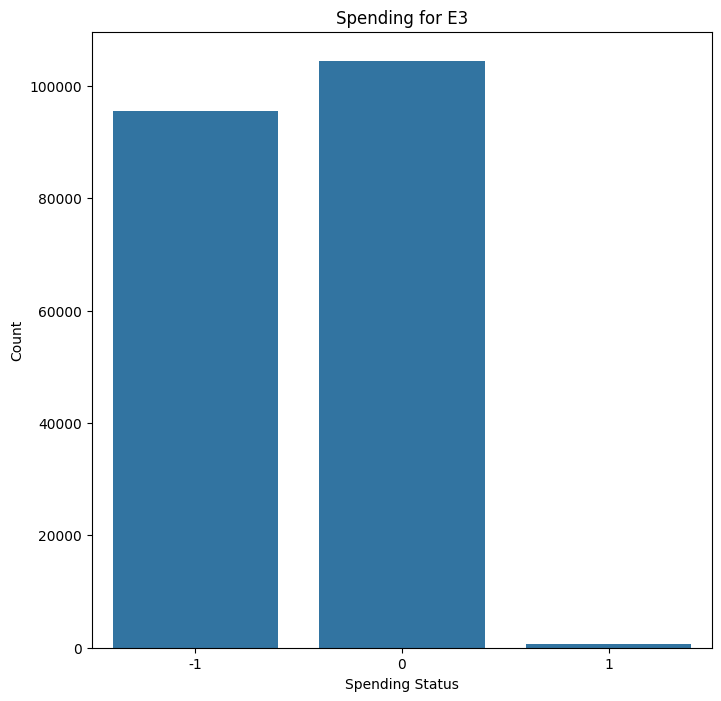

Mean : 144602108.7168565, Median : 0.0, MAX : 1957600000000.0
Corresponding Country is : USA


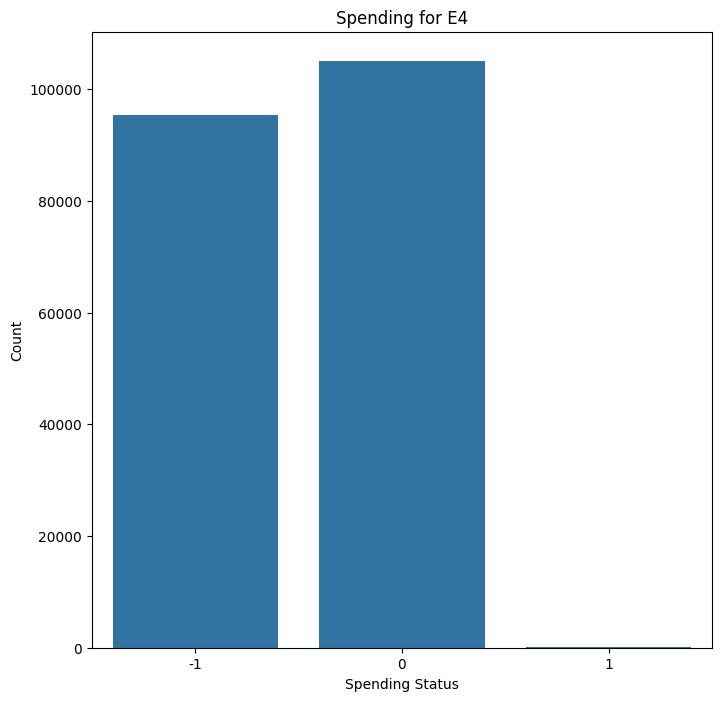

Mean : 8583940.352807585, Median : 0.0, MAX : 834353051822.0
Corresponding Country is : JPN


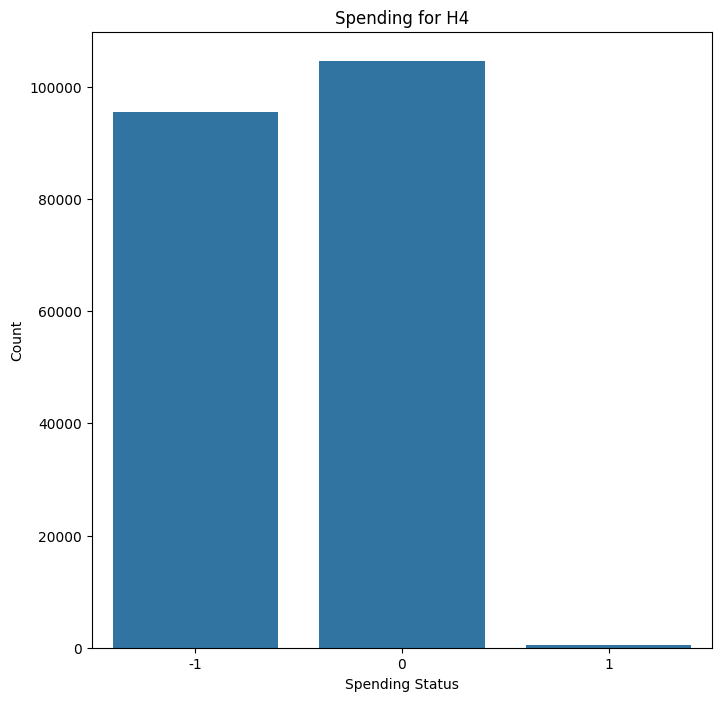

Mean : 8064995.5111537725, Median : 0.0, MAX : 242400000000.0
Corresponding Country is : USA


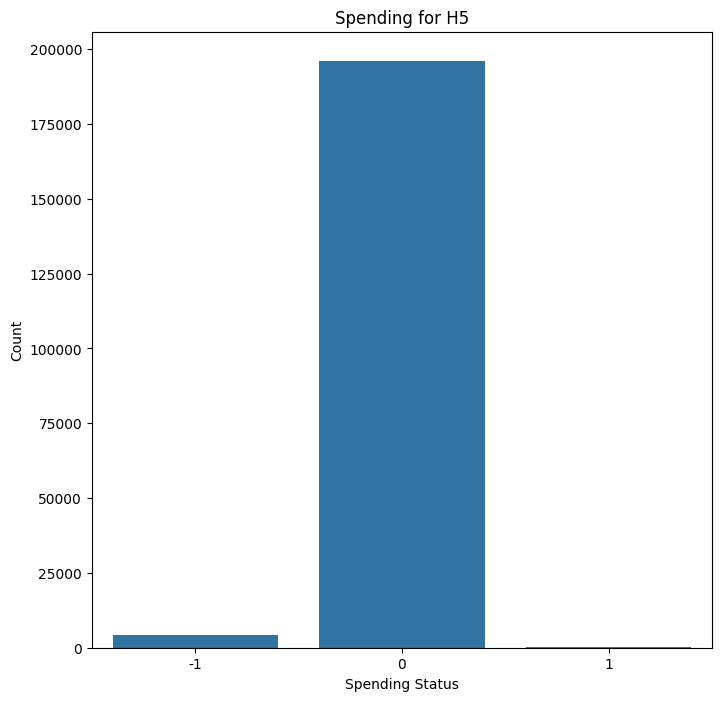

Mean : 415050.7291257457, Median : 0.0, MAX : 15750000000.0
Corresponding Country is : GBR


In [124]:
columns_here = ['E3', 'E4', 'H4', 'H5']
for column in columns_here:
    df[column + '__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else (0 if x == 0 else 1))
    plt.figure(figsize=(8, 8))
    sns.countplot(x=df[column + '__'])
    #plt.legend(labels=['Missing', 'No Spending', 'Spending'], loc='upper right')
    plt.xlabel('Spending Status')
    plt.ylabel('Count')
    plt.title('Spending for ' + column)
    plt.show()
    print(f'Mean : {df[column].mean()}, Median : {df[column].median()}, MAX : {df[column].max()}')
    print(f'Corresponding Country is : {df[df[column] == df[column].max()]["CountryCode"].values[0]}')
    df.drop(column + '__', axis=1, inplace=True)

In [125]:
helper_df.columns

Index(['Column_Name', 'Description', 'Measurement', 'Coding (if given)',
       'customDescription', 'Measurement_2'],
      dtype='object')

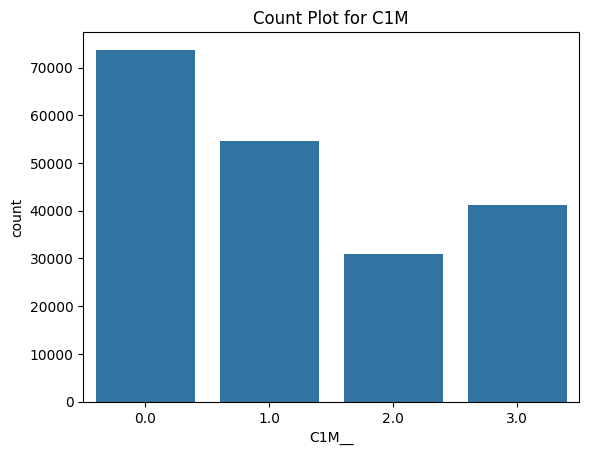

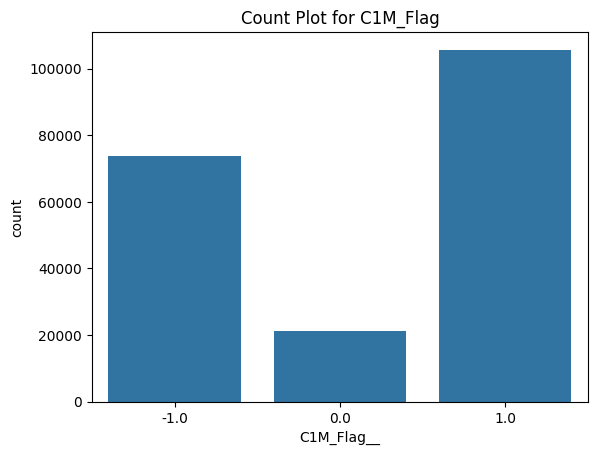

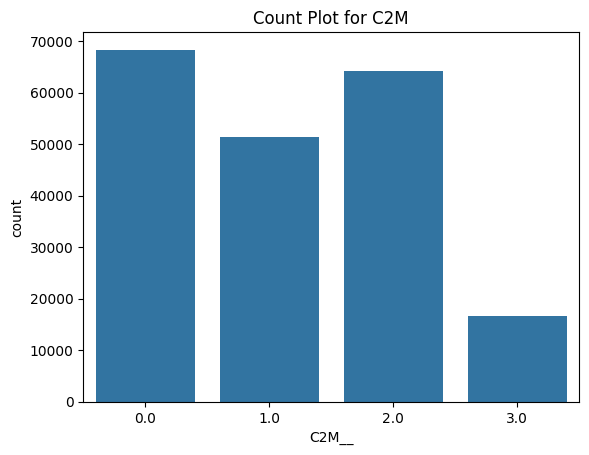

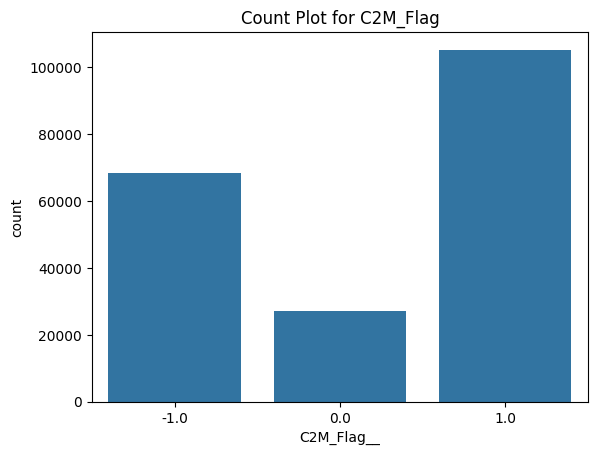

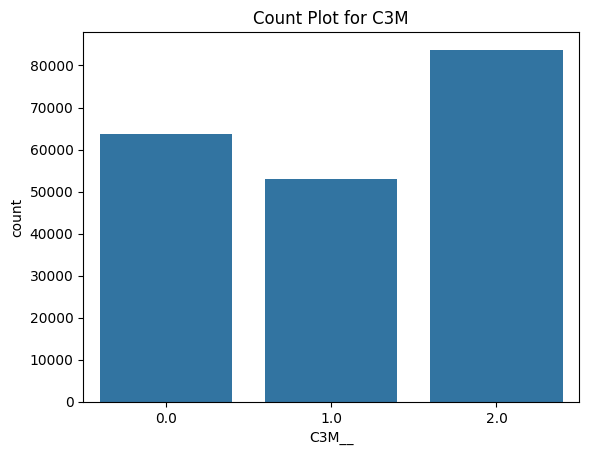

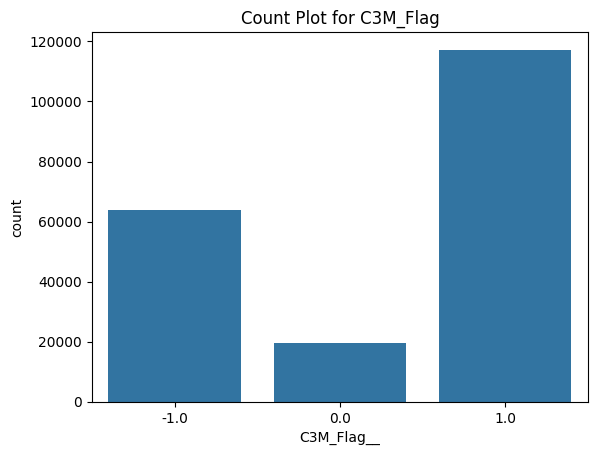

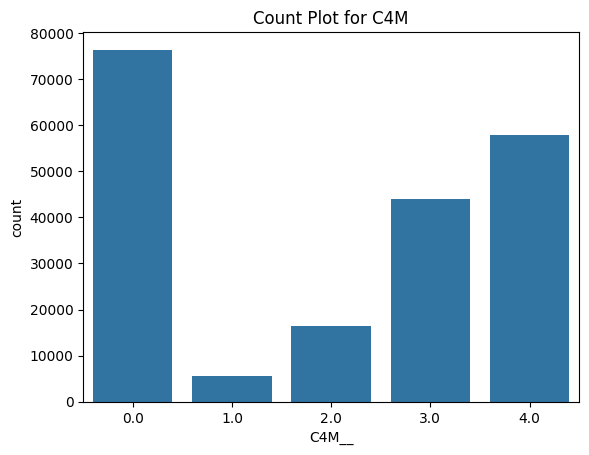

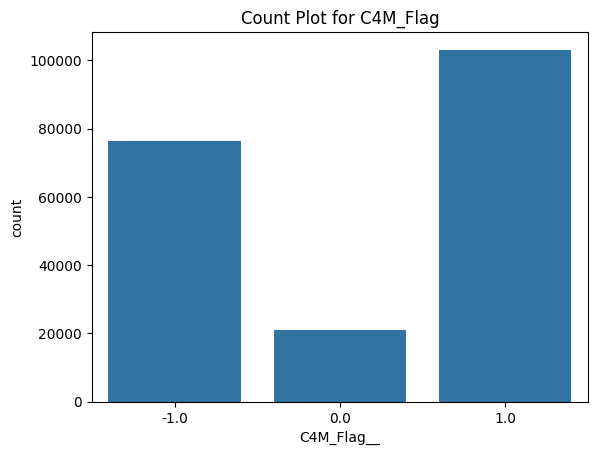

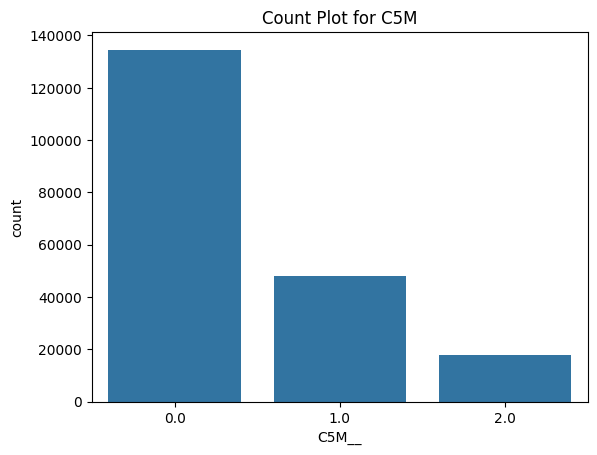

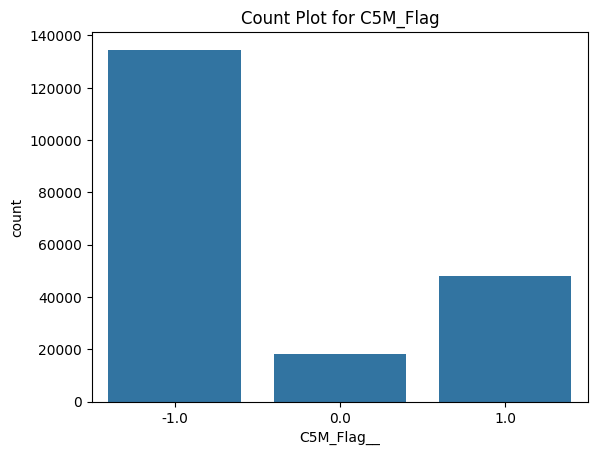

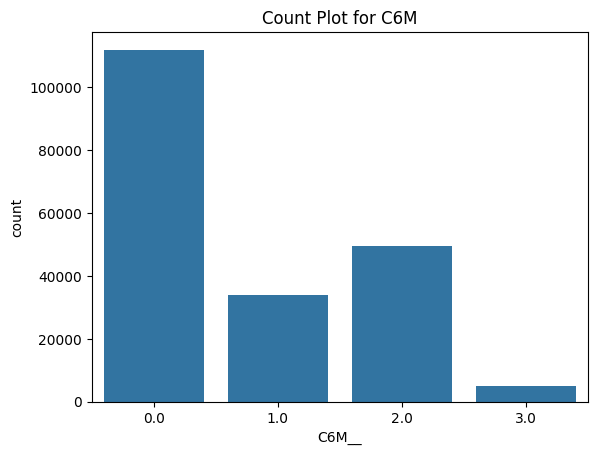

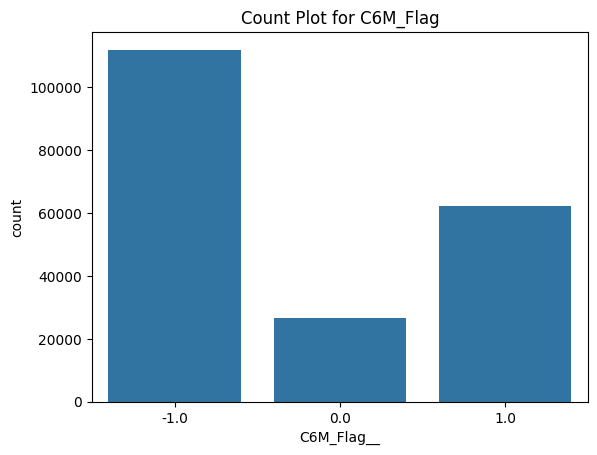

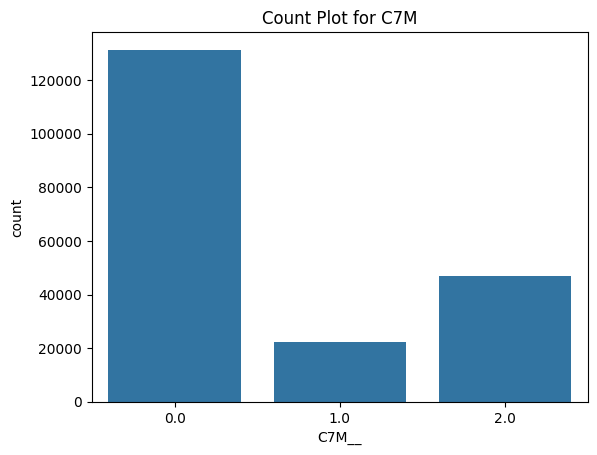

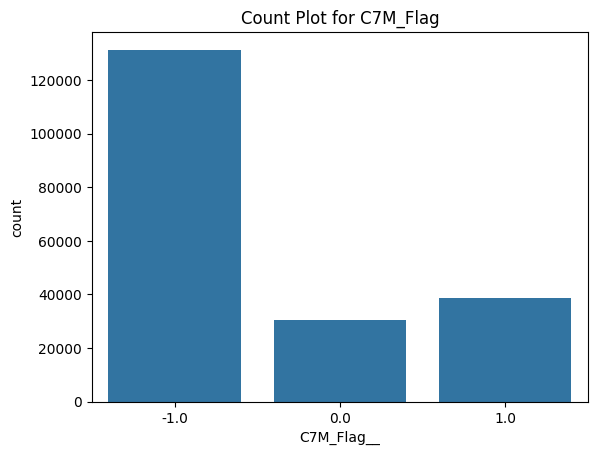

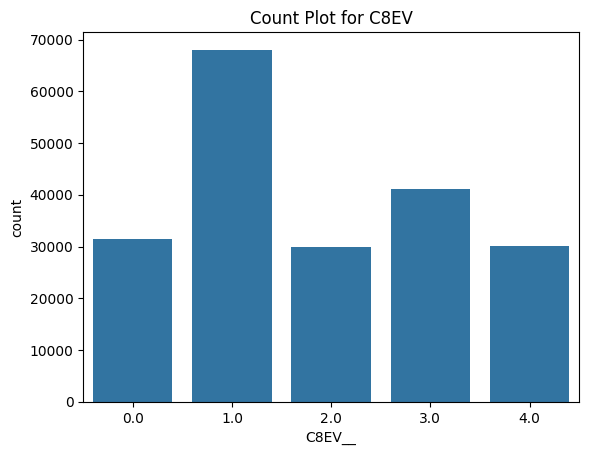

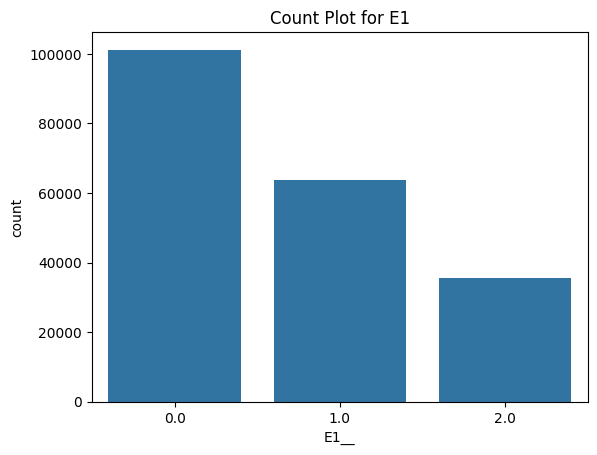

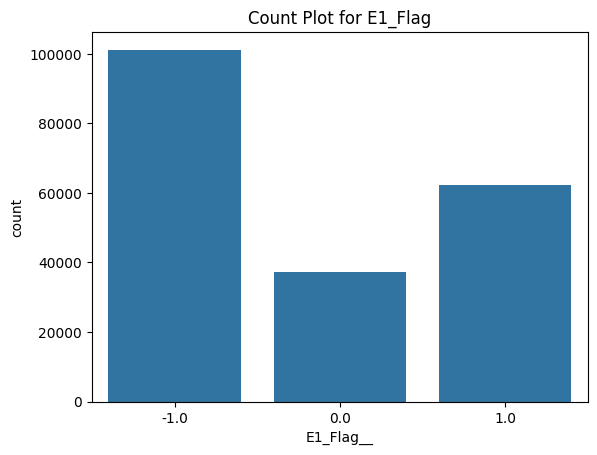

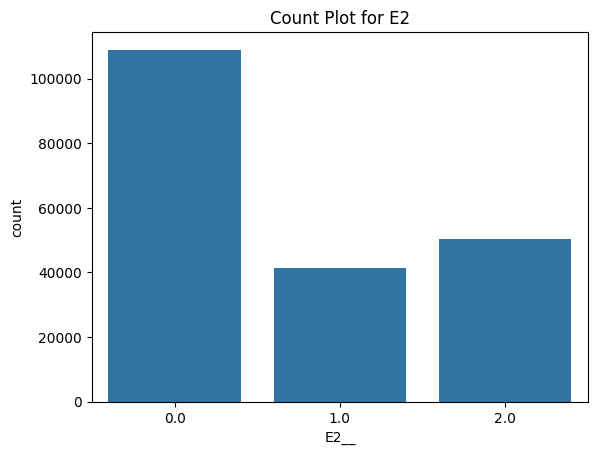

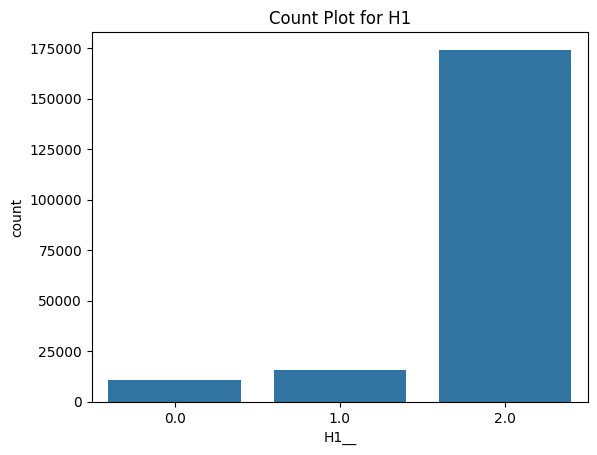

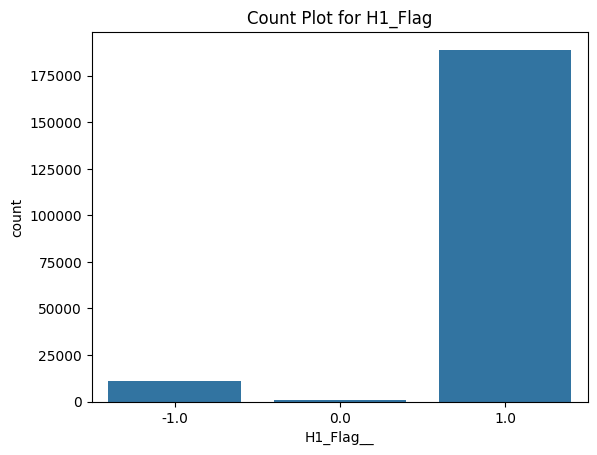

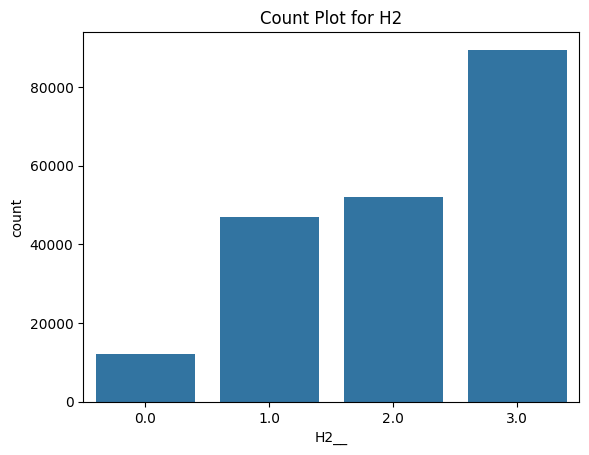

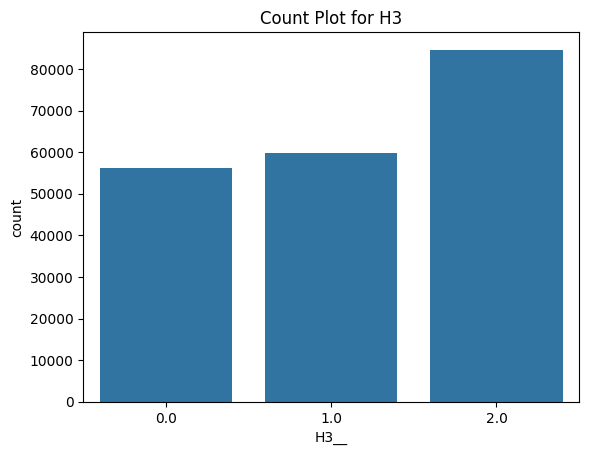

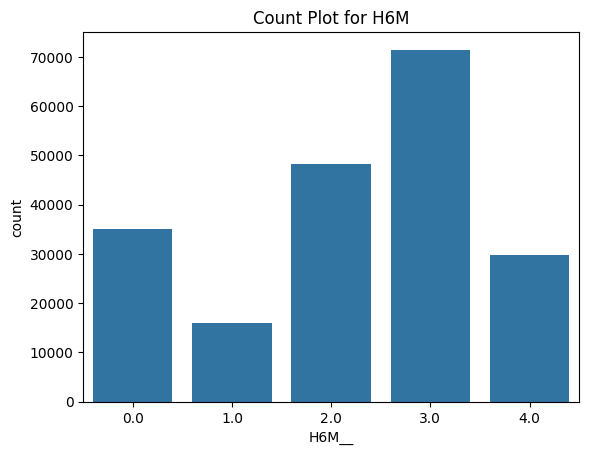

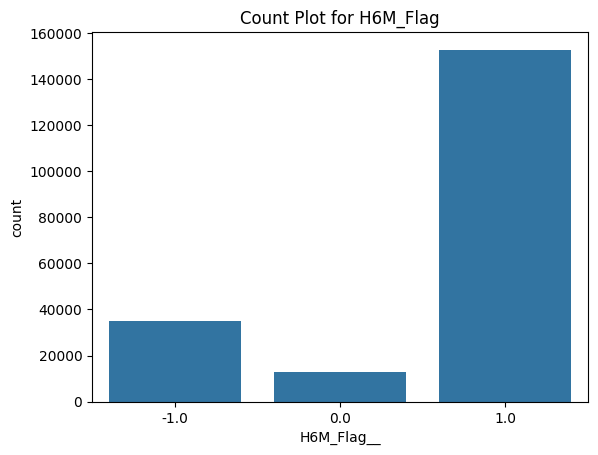

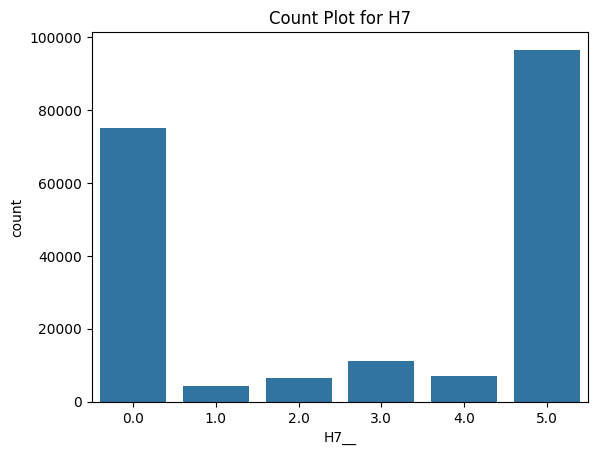

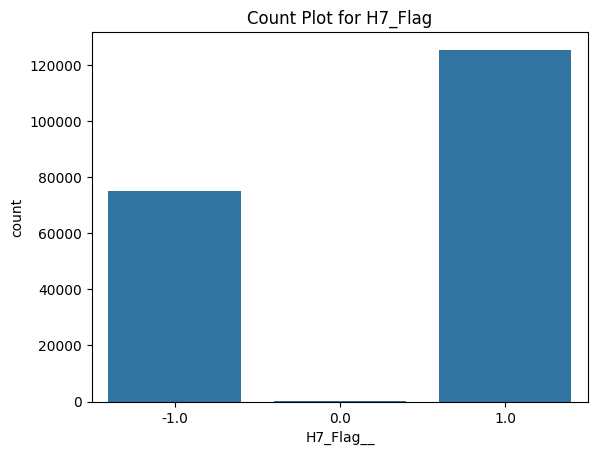

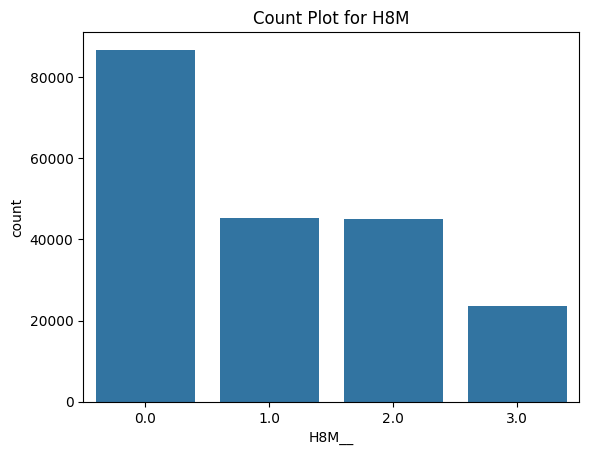

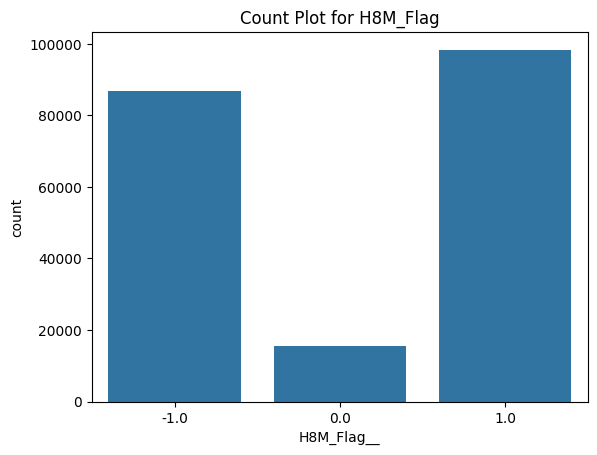

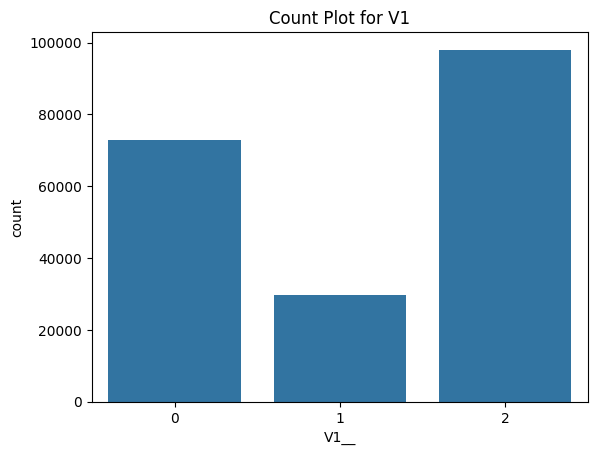

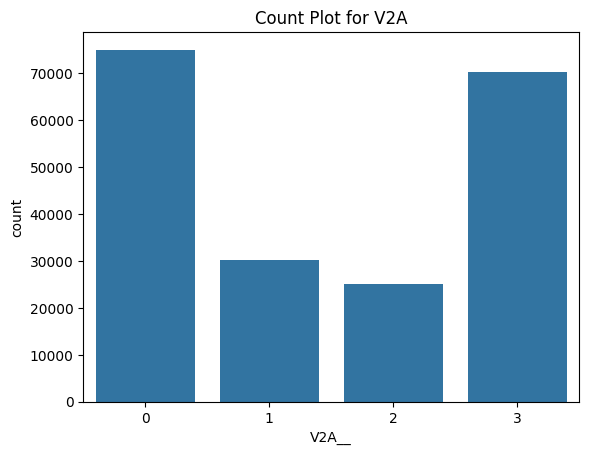

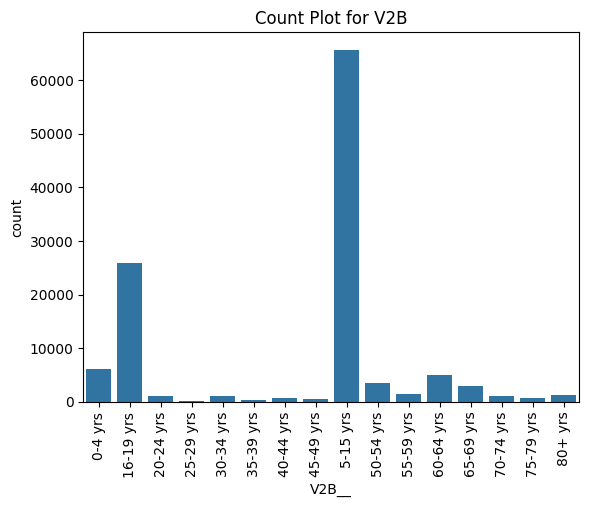

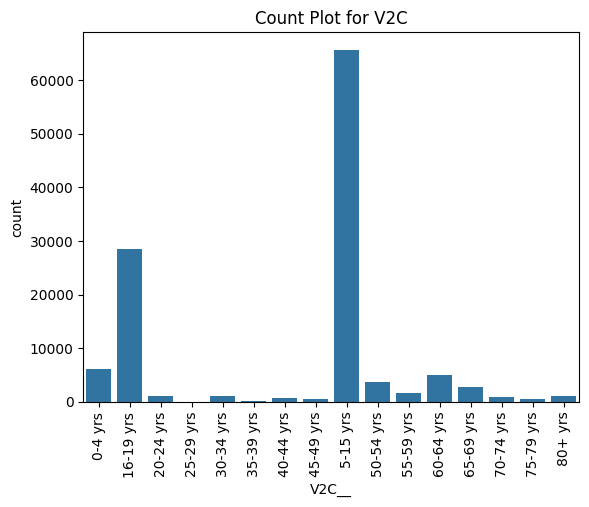

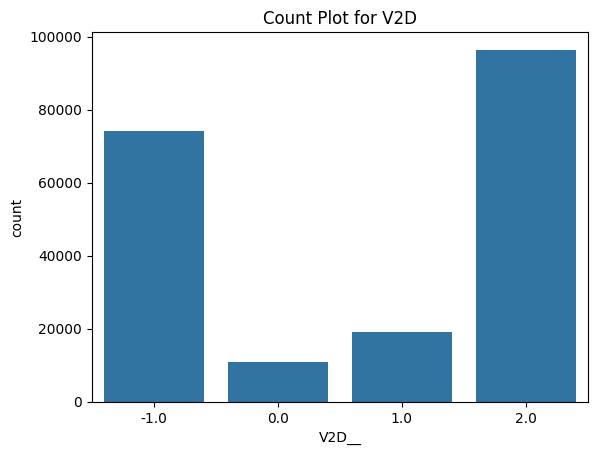

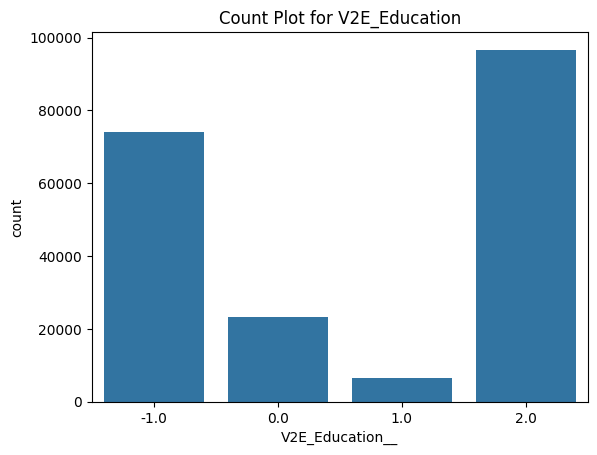

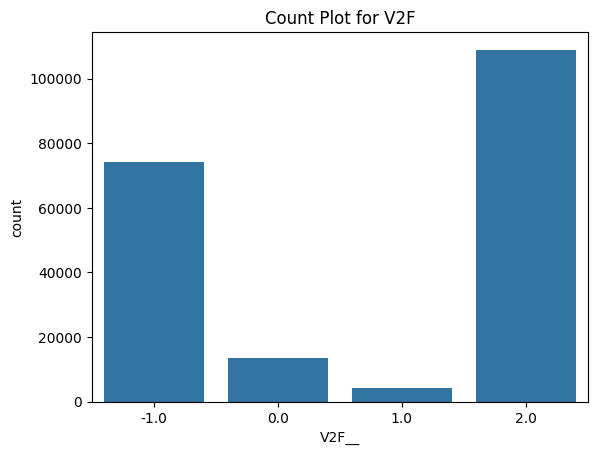

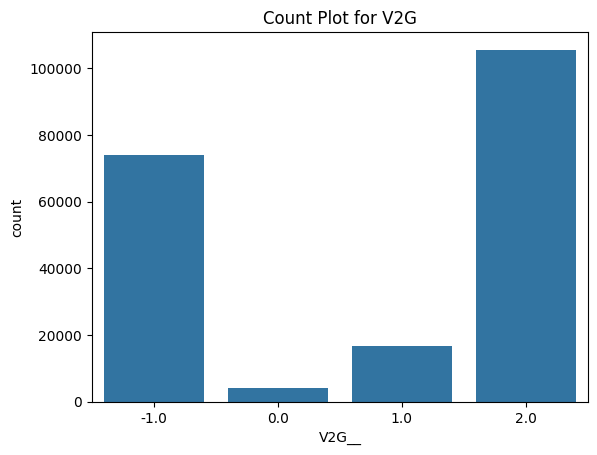

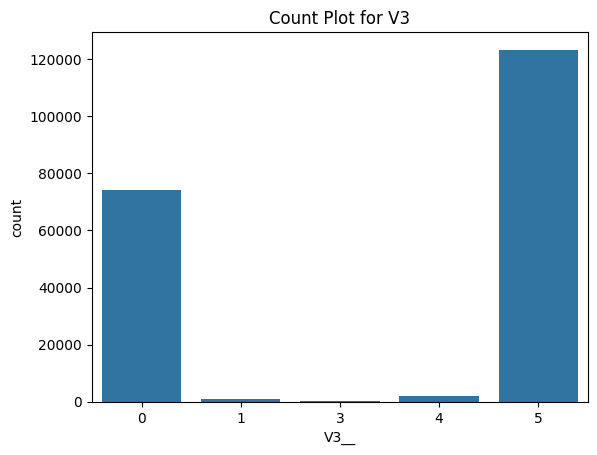

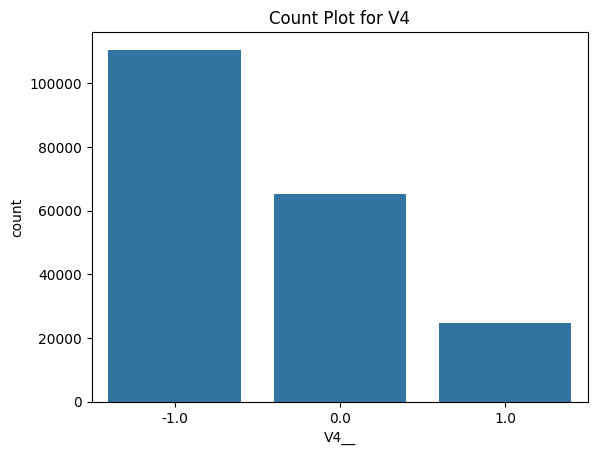

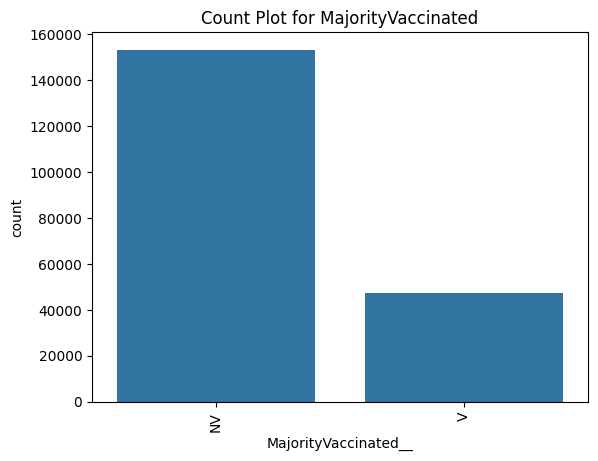

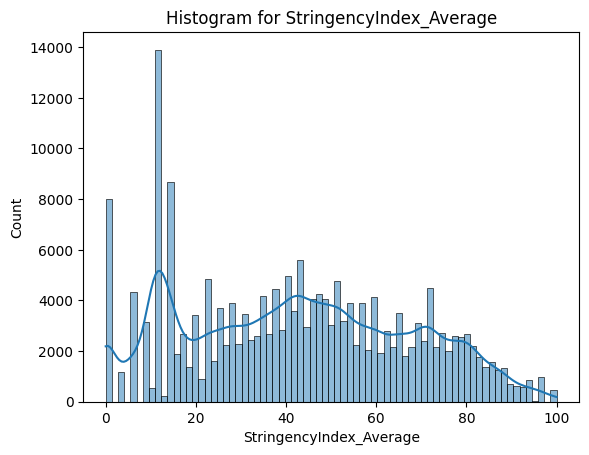

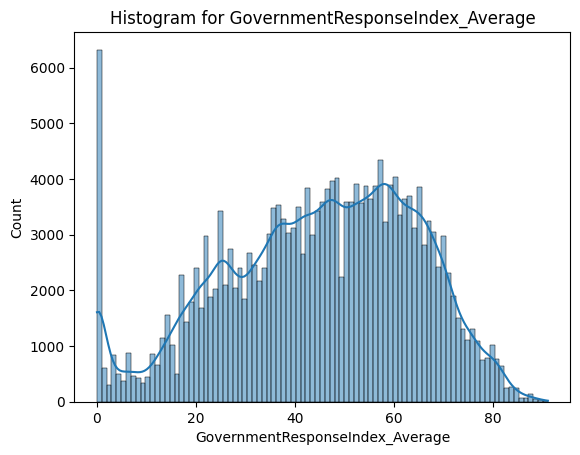

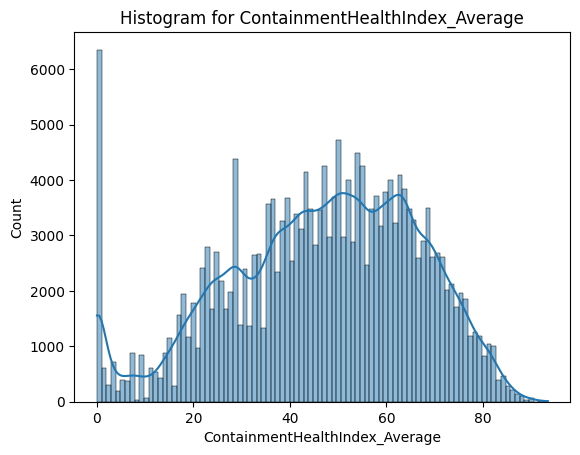

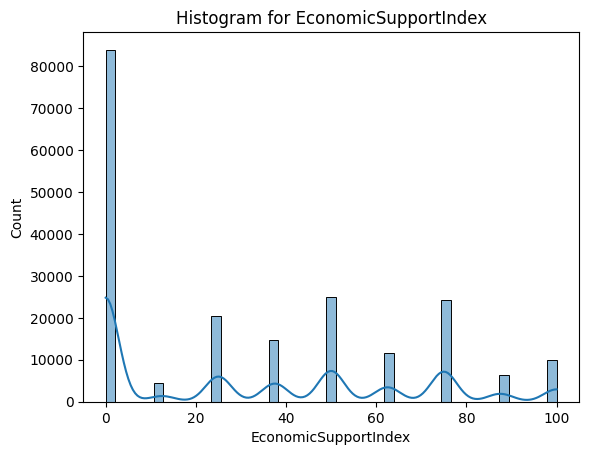

In [126]:
#helper_df = pd.read_csv('/content/drive/MyDrive/CIC/data_description.csv')
def decide_and_plot(df, column, measurement_info):
    if measurement_info in ['BinaryFlag', 'Binary', 'Categorical', 'Ordinal']:
        # Count plot for categorical and binary data
        #df[column + '_temp'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
        if measurement_info == 'Categorical':
            df[column+'__'] = df[column].apply(lambda x: 'Missing' if pd.isnull(x) else x)
            sns.countplot(x=df[column+'__'])
            plt.title(f'Count Plot for {column}')
            plt.xticks(rotation=90)
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        else: 
            df[column+'__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
            sns.countplot(data=df, x=column + '__')
            plt.title(f'Count Plot for {column}')
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        #fig = go.Figure(data=go.Histogram(x=df[column]))
        #fig.update_layout(title_text=f'Count Plot for {column}', xaxis_title=column, yaxis_title='Count')
        #fig.show()
    elif measurement_info in ['USD', 'Number', 'Numeric', 'Numerical']:
        # Histogram for numerical data
        df[column+'__'] = df[column].apply(lambda x: -99 if pd.isnull(x) else x)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Histogram for {column}')
        plt.show()
        df.drop(column+'__', axis=1, inplace=True)

exclude_columns = ['Date', 'CountryName', 'ConfirmedCases', 'ConfirmedDeaths', 'PopulationVaccinated', 'E3', 'E4', 'H4', 'H5']
columns_to_plot = [col for col in df.columns if col not in exclude_columns]


for column in columns_to_plot:
    measurement_type = helper_df[helper_df['Column_Name'] == column]['Measurement_2'].values
    if measurement_type.size > 0:
        decide_and_plot(df, column, measurement_type[0])

#### Considering nationwide policies only

In [127]:
# columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'
flag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]

# flag columns have a value of 1,
df = df[(df[flag_columns] == 1).any(axis=1)]

df = df.drop(columns=flag_columns)

df.shape

(191657, 42)

In [128]:
df.describe()

Date            C1M            C2M  \
count                         191657  191657.000000  191657.000000   
mean   2021-07-23 01:25:15.739054848       1.252519       1.198662   
min              2020-01-01 00:00:00       0.000000       0.000000   
25%              2020-11-03 00:00:00       0.000000       0.000000   
50%              2021-07-23 00:00:00       1.000000       1.000000   
75%              2022-04-11 00:00:00       2.000000       2.000000   
max              2022-12-31 00:00:00       3.000000       3.000000   
std                              NaN       1.137892       0.976257   

                 C3M            C4M            C5M            C6M  \
count  191657.000000  191657.000000  191657.000000  191657.000000   
mean        1.150853       2.100231       0.437239       0.773517   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       3.000000       0.000000       0.000000   
75%         2.000000       4.000000       1.000000       2.000000   
max         2.000000       4.000000       2.000000       3.000000   
std         0.836789       1.693349       0.657060       0.922007   

                 C7M           C8EV             E1       E1_Flag  \
count  191657.000000  191657.000000  191657.000000  99353.000000   
mean        0.606213       1.928956       0.704545      0.625467   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       1.000000       0.000000      0.000000   
50%         0.000000       2.000000       1.000000      1.000000   
75%         1.000000       3.000000       1.000000      1.000000   
max         2.000000       4.000000       2.000000      1.000000   
std         0.853818       1.298341       0.761889      0.484005   

                  E2            E3            E4             H1  \
count  191657.000000  9.676600e+04  9.684700e+04  191657.000000   
mean        0.740719  1.570544e+08  9.308952e+06       1.896842   
min         0.000000 -1.000000e-02 -2.000000e-02       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       2.000000   
50%         0.000000  0.000000e+00  0.000000e+00       2.000000   
75%         2.000000  0.000000e+00  0.000000e+00       2.000000   
max         2.000000  1.957600e+12  8.343531e+11       2.000000   
std         0.847009  1.166871e+10  2.683613e+09       0.338678   

                  H2             H3            H4            H5  \
count  191657.000000  191657.000000  9.676000e+04  1.873820e+05   
mean        2.177134       1.190335  8.684550e+06  4.303805e+05   
min         0.000000       0.000000 -1.000000e-02 -7.000000e-02   
25%         1.000000       1.000000  0.000000e+00  0.000000e+00   
50%         2.000000       1.000000  0.000000e+00  0.000000e+00   
75%         3.000000       2.000000  0.000000e+00  0.000000e+00   
max         3.000000       2.000000  2.424000e+11  1.575000e+10   
std         0.879060       0.808156  9.673808e+08  5.185639e+07   

                 H6M             H7        H7_Flag            H8M  \
count  191657.000000  191657.000000  125021.000000  191657.000000   
mean        2.326004       2.918098       0.999424       1.074346   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       1.000000       0.000000   
50%         3.000000       5.000000       1.000000       1.000000   
75%         3.000000       5.000000       1.000000       2.000000   
max         4.000000       5.000000       1.000000       3.000000   
std         1.231135       2.300101       0.023991       1.061743   

                  V1            V2A            V2D  V2E_Education  \
count  191657.000000  191657.000000  125945.000000  125945.000000   
mean        1.174181       1.513600       1.676105       1.582159   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       2.000000       2.0

### Imputation Strategy

Filling NaNs with mean, median or mode values at National Level. If that fails, a fallback is added to impute a global statistic.

May use it later.

In [129]:
'''
missing_values_count = df.isna().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

column_data_types = df.dtypes

# use mean, median, or mode for imputation, based on the data type
imputation_strategy = {}
for column in missing_values_count.index:
    if column_data_types[column] in ['float64', 'int64']:
        imputation_strategy[column] = 'median'
    else:
        imputation_strategy[column] = 'mode'

# imputation with a fallback
def impute_with_fallback(series, strategy):
    if strategy == 'median':
        global_fallback = series.median()
        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))
    elif strategy == 'mode':
        global_fallback = series.mode().iloc[0] if not series.mode().empty else None
        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))

for column, strategy in imputation_strategy.items():
    if strategy == 'median':
        df[column] = impute_with_fallback(df[column], strategy)
    elif strategy == 'mode':
        df[column] = df[column].astype('str')
        df[column] = impute_with_fallback(df[column], strategy)
        df[column] = df[column].replace('nan', np.nan)


df.isna().sum()

#still need to do it for V2B and V2C
missing_values_after_imputation = df.isna().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]
for column in missing_values_after_imputation.index:
    column_mode = df[column].mode()
    mode_value = column_mode.iloc[0] if not column_mode.empty else np.nan
    df[column] = df[column].fillna(mode_value)

df.isna().sum()
'''

"\nmissing_values_count = df.isna().sum()\nmissing_values_count = missing_values_count[missing_values_count > 0]\n\ncolumn_data_types = df.dtypes\n\n# use mean, median, or mode for imputation, based on the data type\nimputation_strategy = {}\nfor column in missing_values_count.index:\n    if column_data_types[column] in ['float64', 'int64']:\n        imputation_strategy[column] = 'median'\n    else:\n        imputation_strategy[column] = 'mode'\n\n# imputation with a fallback\ndef impute_with_fallback(series, strategy):\n    if strategy == 'median':\n        global_fallback = series.median()\n        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))\n    elif strategy == 'mode':\n        global_fallback = series.mode().iloc[0] if not series.mode().empty else None\n        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))\n\nfor column, strategy in imputati

#### Fill NaNs with 0.

In [130]:
'''
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.loc[:, col] = df[col].fillna(0)
    elif pd.api.types.is_categorical_dtype(df[col]):
        if '0' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories('0')
        df.loc[:, col] = df[col].fillna('0')
'''        

"\nfor col in df.columns:\n    if pd.api.types.is_numeric_dtype(df[col]):\n        df.loc[:, col] = df[col].fillna(0)\n    elif pd.api.types.is_categorical_dtype(df[col]):\n        if '0' not in df[col].cat.categories:\n            df[col] = df[col].cat.add_categories('0')\n        df.loc[:, col] = df[col].fillna('0')\n"

### Correlation Matrix

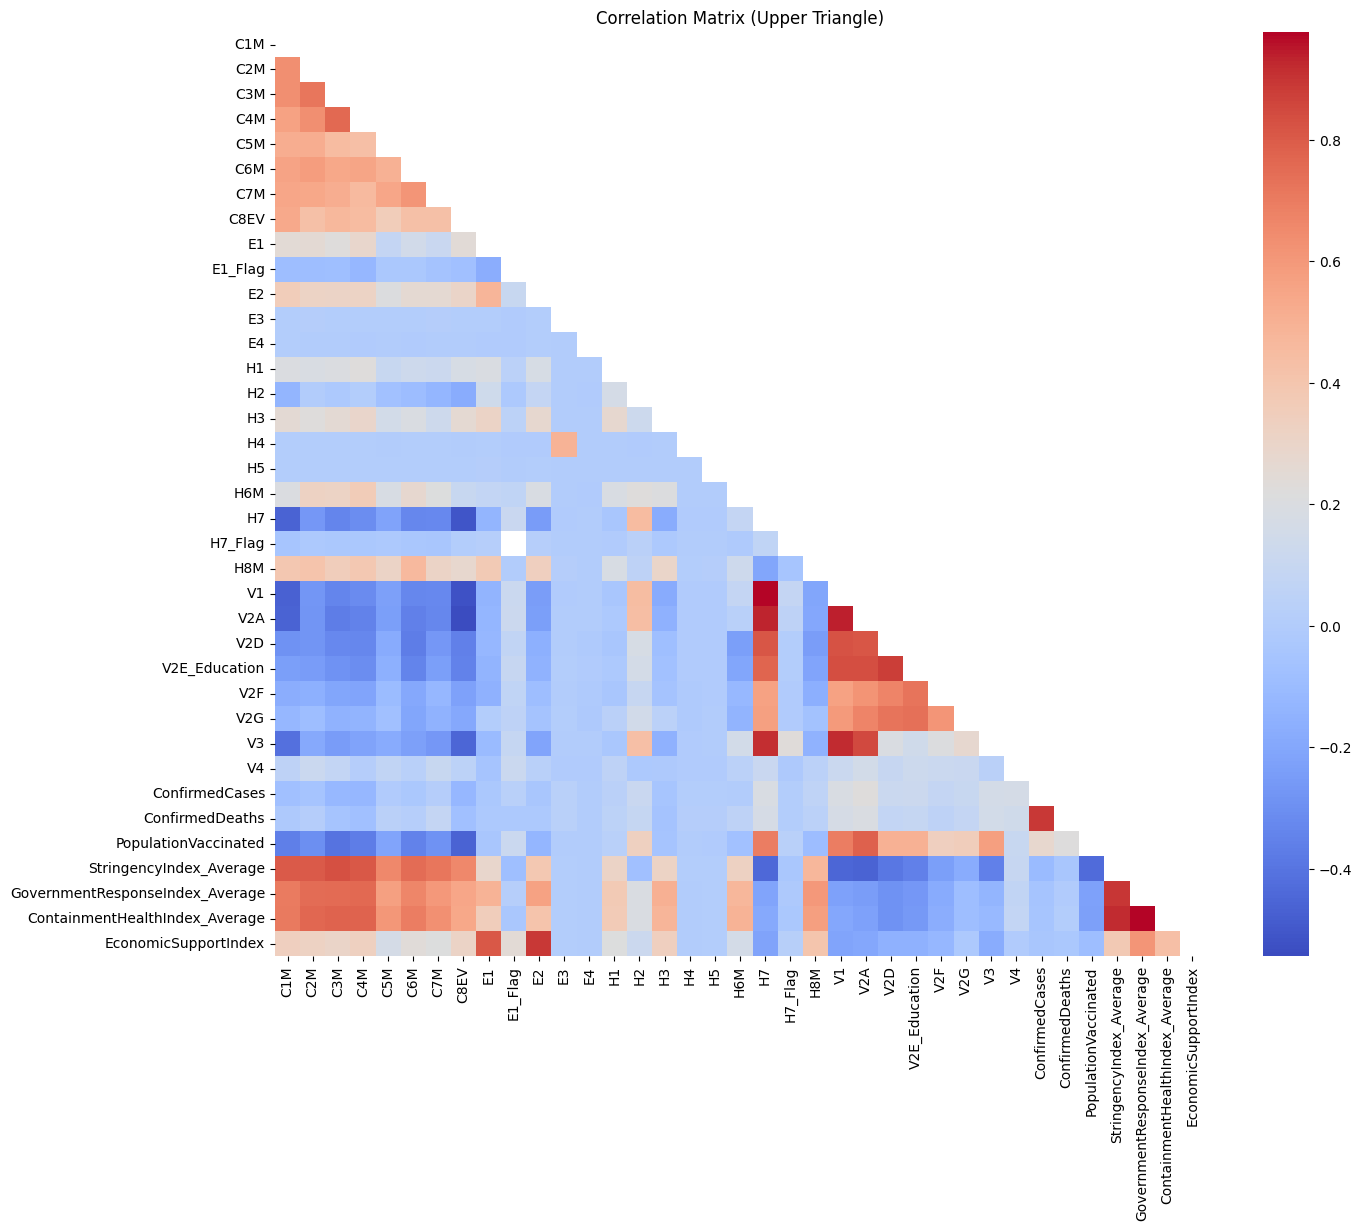

Columns: C8EV and H7, Correlation Coefficient: -0.51
Columns: C6M and H8M, Correlation Coefficient: 0.46
Columns: ContainmentHealthIndex_Average and H6M, Correlation Coefficient: 0.50
Columns: C3M and StringencyIndex_Average, Correlation Coefficient: 0.83
Columns: GovernmentResponseIndex_Average and H6M, Correlation Coefficient: 0.47
Columns: H7 and V2D, Correlation Coefficient: 0.81
Columns: C8EV and GovernmentResponseIndex_Average, Correlation Coefficient: 0.55
Columns: H7 and V1, Correlation Coefficient: 0.97
Columns: V1 and V3, Correlation Coefficient: 0.92
Columns: StringencyIndex_Average and V2A, Correlation Coefficient: -0.47
Columns: C2M and ContainmentHealthIndex_Average, Correlation Coefficient: 0.77
Columns: PopulationVaccinated and V2E_Education, Correlation Coefficient: 0.50
Columns: PopulationVaccinated and V3, Correlation Coefficient: 0.58
Columns: C4M and C5M, Correlation Coefficient: 0.43
Columns: C4M and C8EV, Correlation Coefficient: 0.45
Columns: V2A and V2D, Correl

122

In [131]:
corr_matrix = df.corr(numeric_only=True)

# Mask to display only one half
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False) # since we've too many variables here. However, we shall display pairs having a correlation coefficient more or less than a certain threshold.
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()

# pairs of columns with a correlation coefficient >= 0.4 or <= -0.4
high_correlation_pairs = []

for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row != col:
            if corr_matrix.loc[row, col] >= 0.4 or corr_matrix.loc[row, col] <= -0.4:
                high_correlation_pairs.append((row, col, corr_matrix.loc[row, col]))

unique_pairs = set()
for pair in high_correlation_pairs:
    sorted_pair = tuple(sorted([pair[0], pair[1]])) + (pair[2],)
    unique_pairs.add(sorted_pair)

for pair in unique_pairs:
    print(f"Columns: {pair[0]} and {pair[1]}, Correlation Coefficient: {pair[2]:.2f}")

len(unique_pairs)

In [132]:
aggregation_funcs = {}
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs[column] = 'count'
    elif pd.api.types.is_datetime64_dtype(df[column]):
      continue
    else:
      aggregation_funcs[column] = 'sum'

### TSA

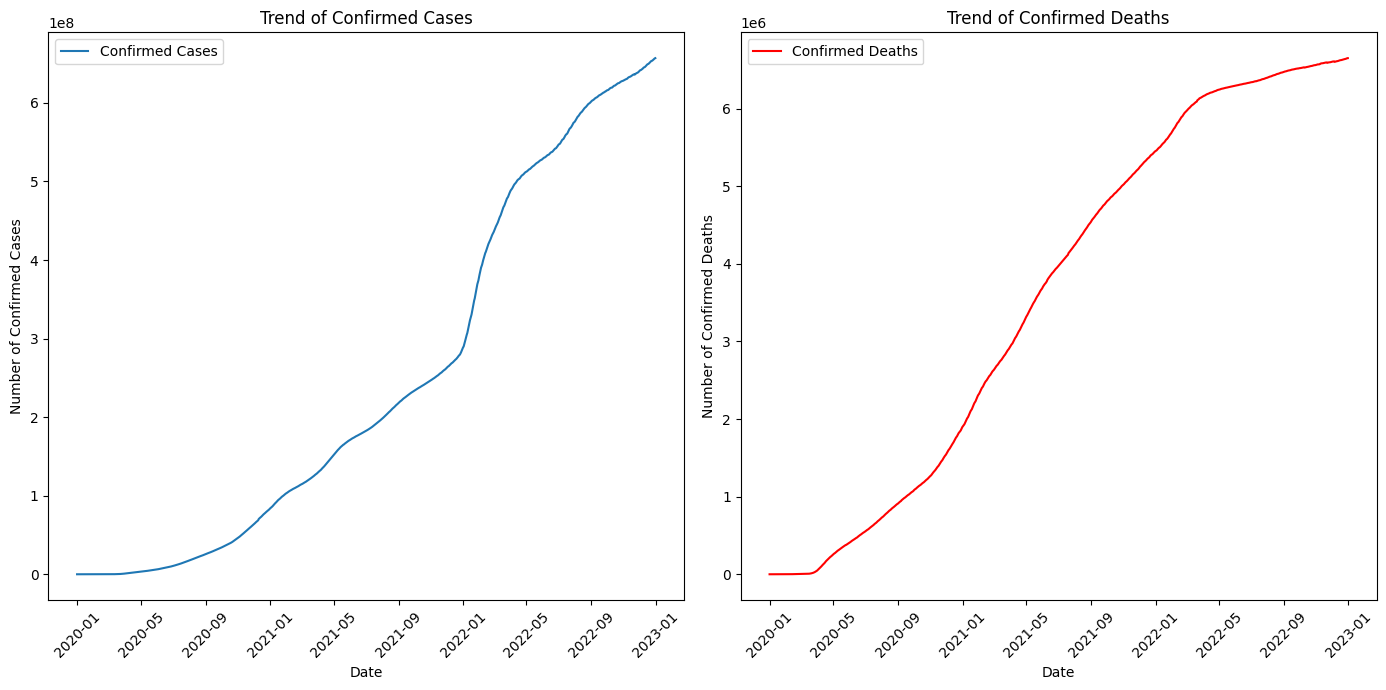

In [133]:
# Aggregating data by date
df_agg_date = df.groupby('Date').agg(aggregation_funcs)

# Plotting ConfirmedCases and ConfirmedDeaths
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedCases'], label='Confirmed Cases')
plt.title('Trend of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedDeaths'], label='Confirmed Deaths', color='red')
plt.title('Trend of Confirmed Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Deaths')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [134]:
print('The total number of covid-19 cases in our dataset are {}'.format(df_agg_date['ConfirmedCases'].iloc[-1]))

The total number of covid-19 cases in our dataset are 657038417.0


In [135]:
df_agg_date.describe()

CountryCode          C1M          C2M          C3M          C4M  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean    174.869526   219.027372   209.609489   201.249088   367.266423   
std      30.732077   140.006162   103.182079    98.777861   207.028519   
min       4.000000     0.000000     0.000000     0.000000     0.000000   
25%     182.000000    68.000000   102.500000    99.000000   132.000000   
50%     183.000000   220.500000   247.000000   243.000000   481.500000   
75%     183.000000   309.000000   283.000000   274.000000   543.000000   
max     183.000000   531.000000   430.000000   353.000000   603.000000   

               C5M          C6M          C7M         C8EV           E1  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     76.459854   135.264599   106.008212   337.315693   123.203467   
std      49.456907    91.426749    73.049998   177.480404    54.702012   
min       0.000000     0.000000     0.000000     1.000000     0.000000   
25%      24.750000    27.000000    26.000000   166.000000    79.000000   
50%      89.500000   175.000000   124.000000   360.000000   131.500000   
75%     106.000000   205.000000   155.000000   457.000000   169.000000   
max     214.000000   325.000000   296.000000   663.000000   192.000000   

           E1_Flag           E2            E3            E4           H1  \
count  1096.000000  1096.000000  1.096000e+03  1.096000e+03  1096.000000   
mean     56.698905   129.529197  1.386636e+10  8.225767e+08   331.699818   
std      21.319287    66.164822  1.176816e+11  2.523747e+10    64.424450   
min       0.000000     0.000000 -1.000000e-02 -2.000000e-02     5.000000   
25%      39.000000    63.000000  0.000000e+00  0.000000e+00   338.750000   
50%      66.000000   135.000000  0.000000e+00  0.000000e+00   351.000000   
75%      72.000000   184.250000  0.000000e+00  0.000000e+00   357.000000   
max      82.000000   224.000000  2.387742e+12  8.347756e+11   362.000000   

                H2           H3            H4            H5          H6M  \
count  1096.000000  1096.000000  1.096000e+03  1.096000e+03  1096.000000   
mean    380.714416   208.153285  7.667127e+08  7.358171e+07   406.747263   
std     110.517734    67.119931  9.221776e+09  7.144252e+08   149.777329   
min       0.000000     0.000000 -1.000000e-02 -7.000000e-02     0.000000   
25%     343.000000   167.000000  0.000000e+00  0.000000e+00   344.000000   
50%     429.500000   231.000000  0.000000e+00  0.000000e+00   481.000000   
75%     458.000000   259.000000  0.000000e+00  0.000000e+00   517.000000   
max     474.000000   283.000000  2.461622e+11  1.575000e+10   544.000000   

                H7      H7_Flag          H8M           V1          V2A  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean    510.286496   114.004562   187.870438   205.328467   264.682482   
std     405.524958    83.488281    83.704894   158.759218   219.539634   
min       0.000000     0.000000     2.000000     0.000000     0.000000   
25%       0.000000     0.000000   114.000000     1.000000     0.000000   
50%     731.000000   177.000000   210.500000   280.000000   315.000000   
75%     895.000000   182.000000   255.250000   358.000000   498.000000   
max     908.000000   183.000000   336.000000   363.000000   507.000000   

               V2B          V2C          V2D  V2E_Education          V2F  \
count  1096.000000  1096.000000  1096.000000    1096.000000  1096.000000   
mean    107.118613   108.750912   192.606752     181.811131   201.668796   
std      82.207570    83.105616   159.218576     157.820943   159.237541   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.000000     0.000000     0.000000       0.000000     0.000000   
50%     167.000000   171.000000   262.000000     237.000000   310.000000   
75%     180.000000   181.000000   352.000000     345.000000   350.000000   
max     181.000000   182.000

In [136]:
df_agg_date.tail()
df_monthly = df_agg_date.resample('M').mean()
df_monthly.head(25)
#df_monthly.tail(25)

CountryCode         C1M         C2M         C3M         C4M  \
Date                                                                      
2020-01-31    21.903226    2.419355    1.129032    1.741935    1.225806   
2020-02-29    89.655172   25.724138   10.482759   14.758621    8.551724   
2020-03-31   160.580645  297.612903  167.580645  201.580645  260.838710   
2020-04-30   183.000000  525.300000  415.466667  349.333333  592.566667   
2020-05-31   183.000000  488.709677  352.032258  341.516129  592.096774   
2020-06-30   183.000000  423.333333  286.366667  304.200000  516.733333   
2020-07-31   183.000000  391.548387  265.290323  275.903226  487.000000   
2020-08-31   183.000000  387.903226  282.483871  271.483871  497.677419   
2020-09-30   183.000000  345.166667  273.500000  270.066667  499.033333   
2020-10-31   183.000000  310.516129  259.290323  264.709677  517.645161   
2020-11-30   183.000000  301.300000  269.600000  266.966667  537.166667   
2020-12-31   183.000000  313.741935  284.354839  274.258065  546.612903   
2021-01-31   183.000000  327.935484  293.322581  276.838710  558.064516   
2021-02-28   183.000000  300.142857  289.214286  276.750000  559.571429   
2021-03-31   183.000000  285.354839  299.354839  282.967742  562.612903   
2021-04-30   182.400000  285.300000  305.900000  283.733333  564.333333   
2021-05-31   182.419355  263.064516  293.806452  274.612903  558.709677   
2021-06-30   182.700000  262.333333  278.300000  262.266667  545.333333   
2021-07-31   183.000000  254.096774  266.548387  252.451613  528.193548   
2021-08-31   183.000000  239.903226  254.193548  243.096774  514.451613   
2021-09-30   183.000000  217.066667  247.566667  244.800000  485.133333   
2021-10-31   183.000000  193.774194  230.709677  239.032258  456.741935   
2021-11-30   183.000000  183.033333  222.866667  227.833333  428.833333   
2021-12-31   183.000000  185.290323  219.161290  220.612903  423.548387   
2022-01-31   183.000000  191.806452  233.870968  221.290323  424.548387   

                   C5M         C6M         C7M        C8EV          E1  \
Date                                                                     
2020-01-31    0.451613    0.838710    0.451613   11.548387    0.000000   
2020-02-29    2.620690    7.586207    4.586207  120.586207    0.862069   
2020-03-31   67.322581  104.483871  106.612903  409.870968   43.419355   
2020-04-30  207.266667  311.033333  284.500000  656.900000  157.866667   
2020-05-31  174.483871  272.419355  254.548387  645.548387  184.064516   
2020-06-30  142.033333  213.533333  199.466667  612.300000  189.766667   
2020-07-31  123.774194  183.258065  176.935484  568.451613  186.193548   
2020-08-31  114.387097  189.870968  175.516129  527.870968  185.677419   
2020-09-30   98.066667  181.933333  156.466667  490.433333  183.100000   
2020-10-31   87.580645  178.548387  146.161290  442.032258  171.580645   
2020-11-30   84.366667  192.366667  153.766667  427.266667  174.600000   
2020-12-31   93.000000  211.451613  155.290323  431.677419  173.483871   
2021-01-31   96.419355  229.516129  161.838710  457.258065  166.129032   
2021-02-28  100.142857  234.107143  151.714286  461.678571  162.642857   
2021-03-31  100.516129  232.096774  151.290323  455.096774  166.354839   
2021-04-30  111.966667  233.800000  152.933333  460.500000  167.800000   
2021-05-31  112.645161  222.096774  142.709677  453.612903  167.580645   
2021-06-30  103.700000  201.933333  134.666667  422.533333  166.266667   
2021-07-31   94.096774  183.967742  131.483871  405.741935  154.419355   
2021-08-31  104.677419  187.032258  125.322581  374.516129  149.419355   
2021-09-30  106.866667  178.466667  125.266667  354.000000  135.866667   
2021-10-31   96.838710  152.354839  107.354839  334.645161  130.516129   
2021-11-30   78.300000  143.366667   95.366667  316.333333  125.266667   
2021-12-31   69.354839  131.000000   87.774194  356.387097  121.580645   
2022-01-31   66.258065  127.000000   87.387097  312.935484  12

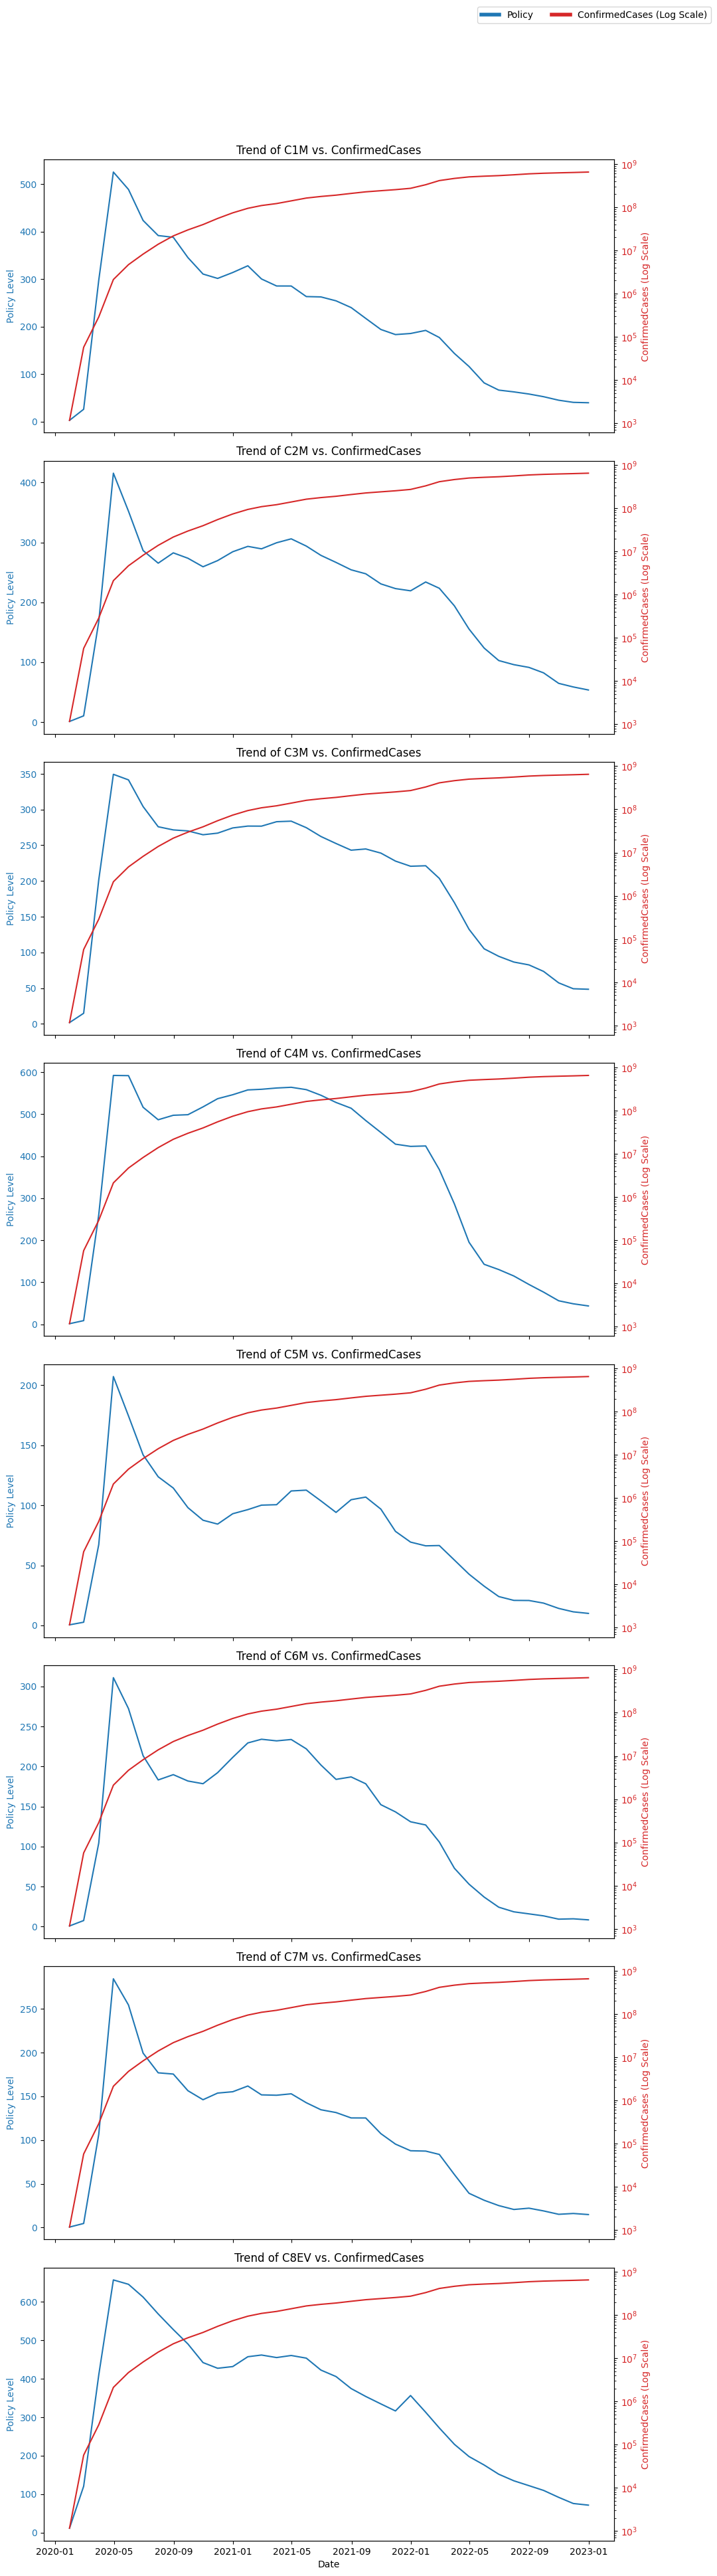

In [137]:
containment_policy_columns = ['C1M', 'C2M', 'C3M',
                  'C4M', 'C5M',
                  'C6M', 'C7M',
                  'C8EV']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(containment_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



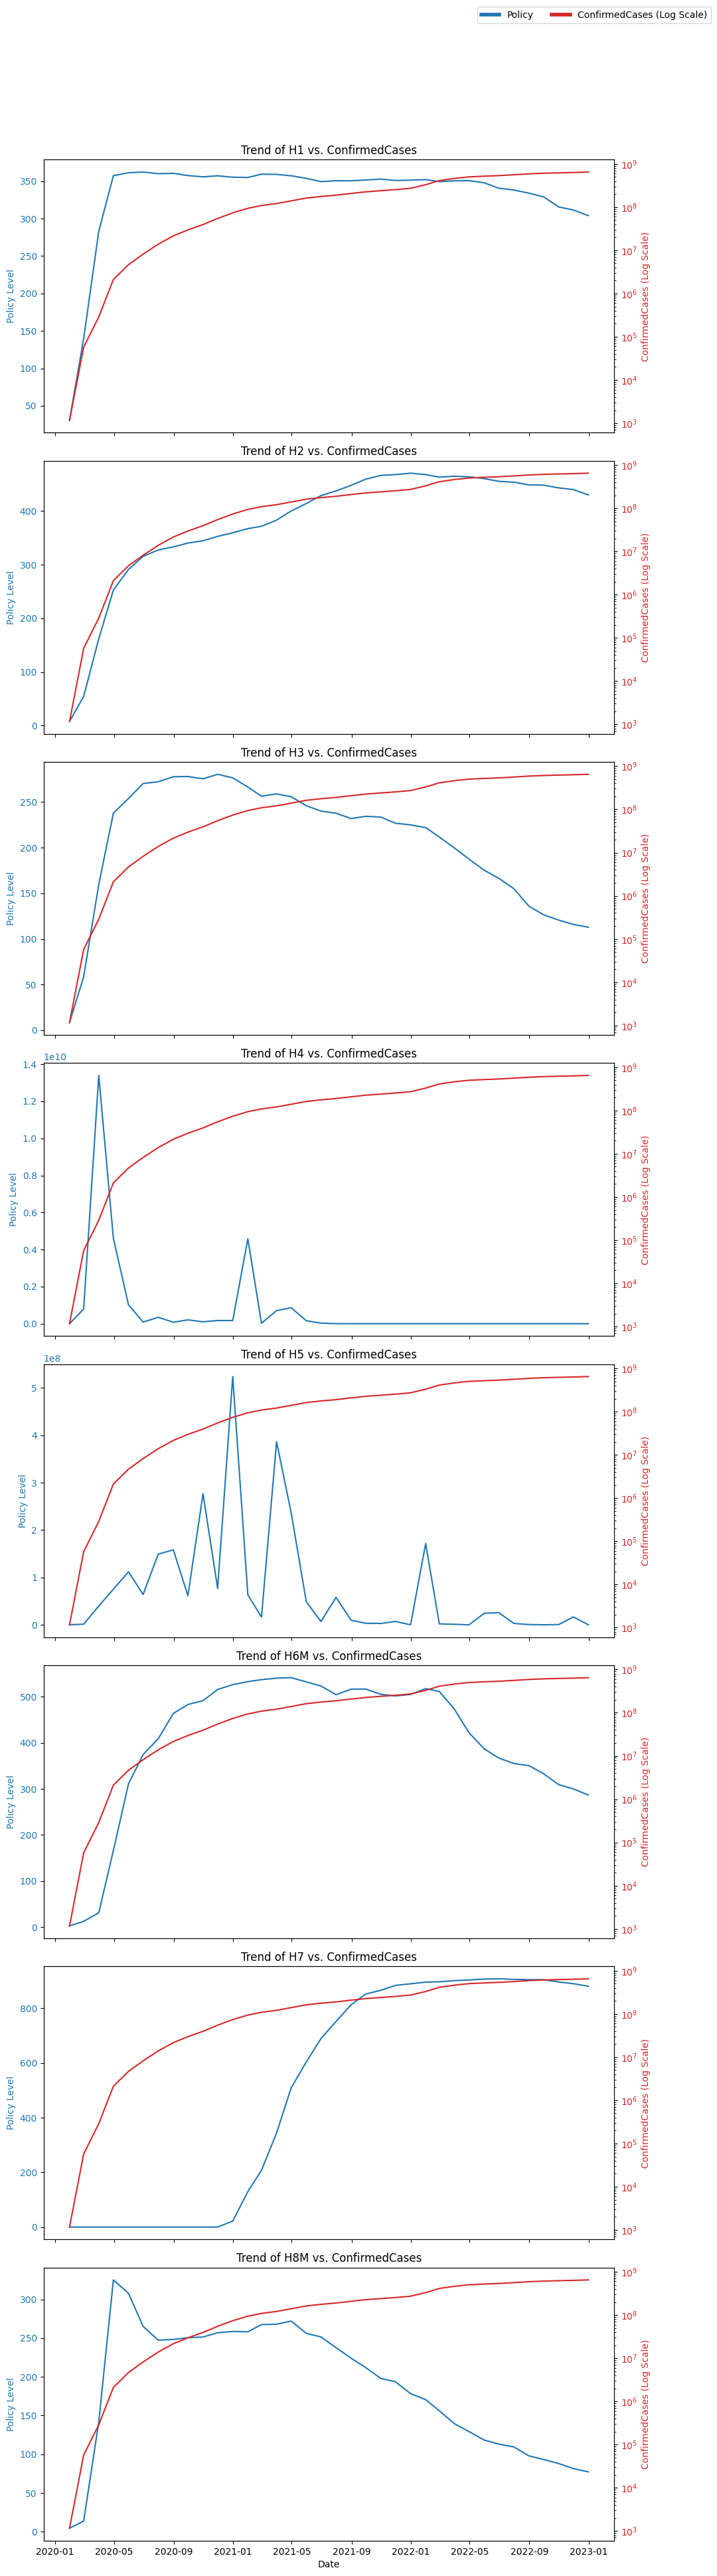

In [138]:
health_policy_columns = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H7', 'H8M']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(health_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')



custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()





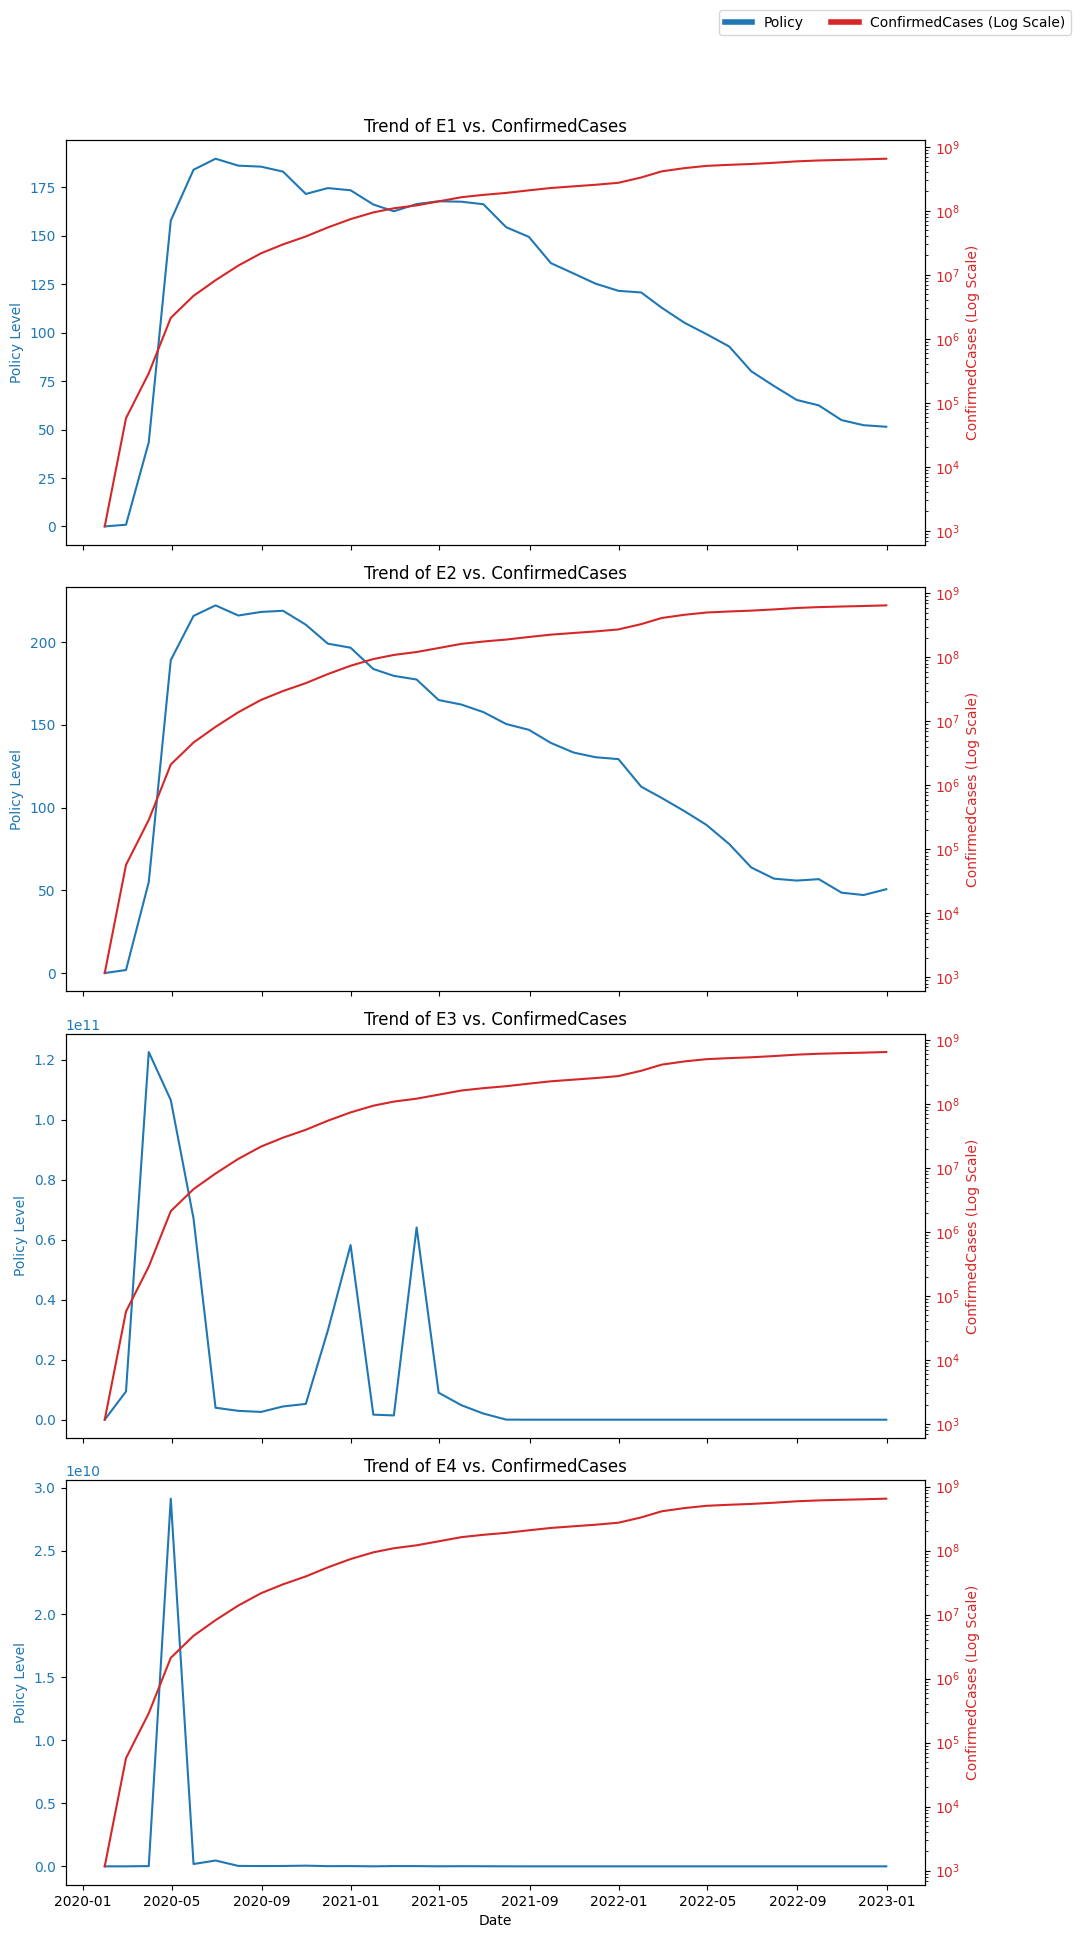

In [139]:
economic_policy_columns = ['E1','E2', 'E3', 'E4']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(economic_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [140]:
df_monthly.head(1)

CountryCode       C1M       C2M       C3M       C4M       C5M  \
Date                                                                        
2020-01-31    21.903226  2.419355  1.129032  1.741935  1.225806  0.451613   

                C6M       C7M       C8EV   E1  E1_Flag   E2   E3   E4  \
Date                                                                    
2020-01-31  0.83871  0.451613  11.548387  0.0      0.0  0.0  0.0  0.0   

                   H1        H2        H3   H4           H5       H6M   H7  \
Date                                                                         
2020-01-31  30.612903  7.580645  8.387097  0.0  7966.483871  2.806452  0.0   

            H7_Flag       H8M   V1  V2A  V2B  V2C  V2D  V2E_Education  V2F  \
Date                                                                         
2020-01-31      0.0  4.612903  0.0  0.0  0.0  0.0  0.0            0.0  0.0   

            V2G        V3   V4  ConfirmedCases  ConfirmedDeaths  \
Date                                                              
2020-01-31  0.0  0.258065  0.0     1166.516129        26.741935   

            MajorityVaccinated  PopulationVaccinated  StringencyIndex_Average  \
Date                                                                            
2020-01-31           21.903226                   0.0                   232.47   

            GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
Date                                                                          
2020-01-31                       186.363548                      212.984194   

            EconomicSupportIndex  
Date                              
2020-01-31                   0.0

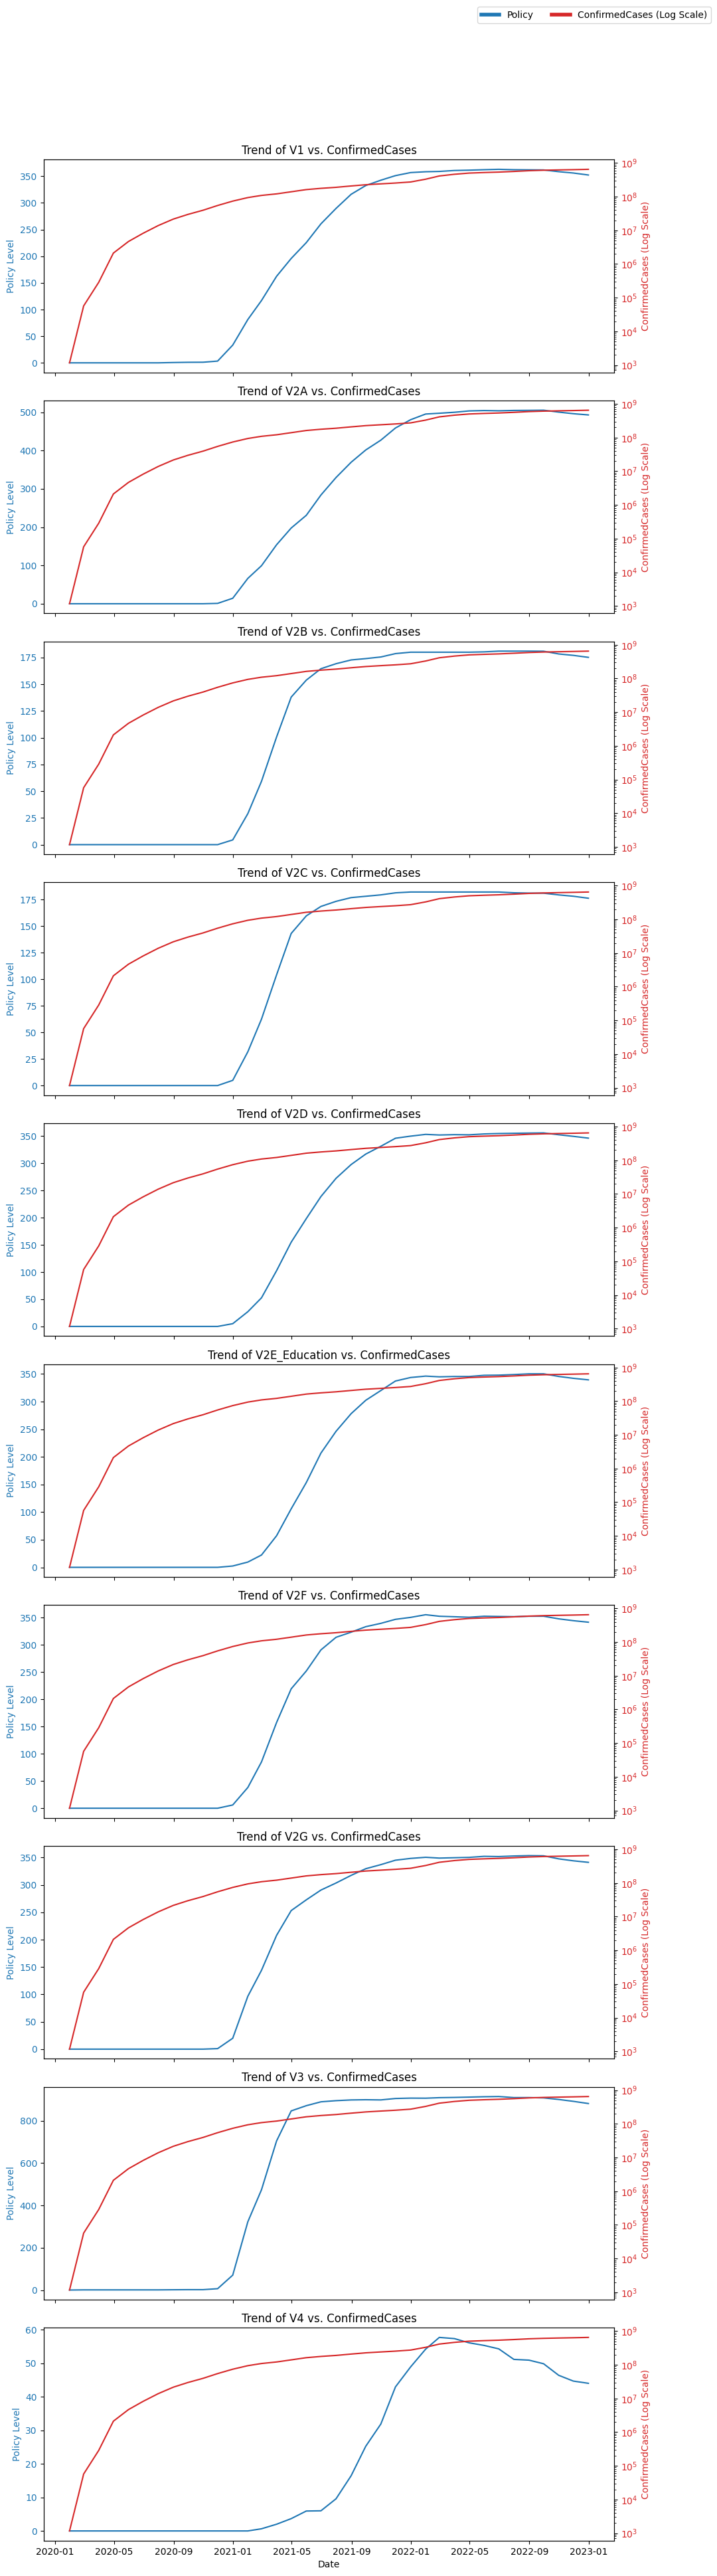

In [141]:
vaccination_policy_columns = ['V1', 'V2A', 'V2B','V2C','V2D', 'V2E_Education','V2F', 'V2G', 'V3', 'V4']
fig, axes = plt.subplots(nrows=len(vaccination_policy_columns), ncols=1, figsize=(10, 40), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(vaccination_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

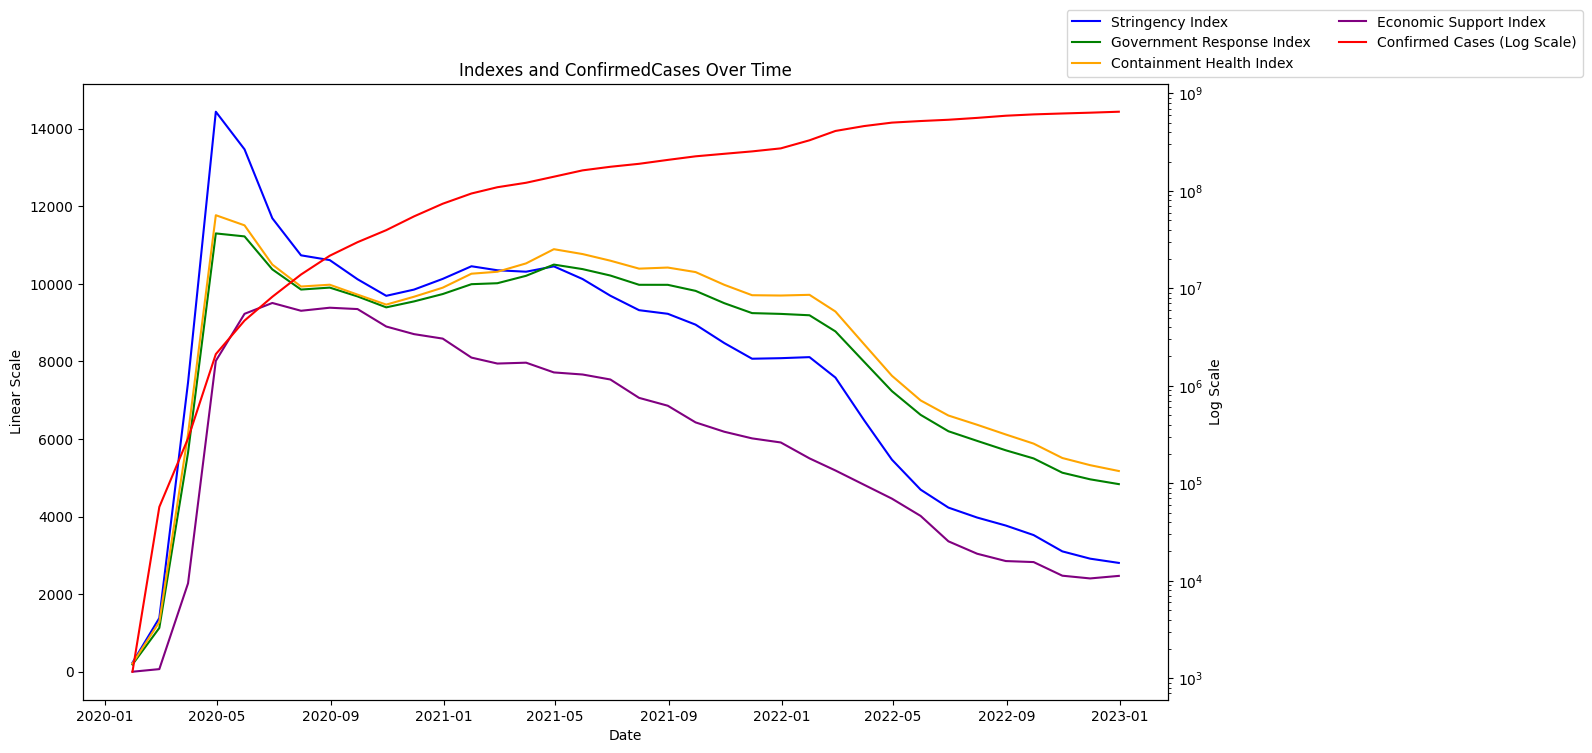

In [142]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

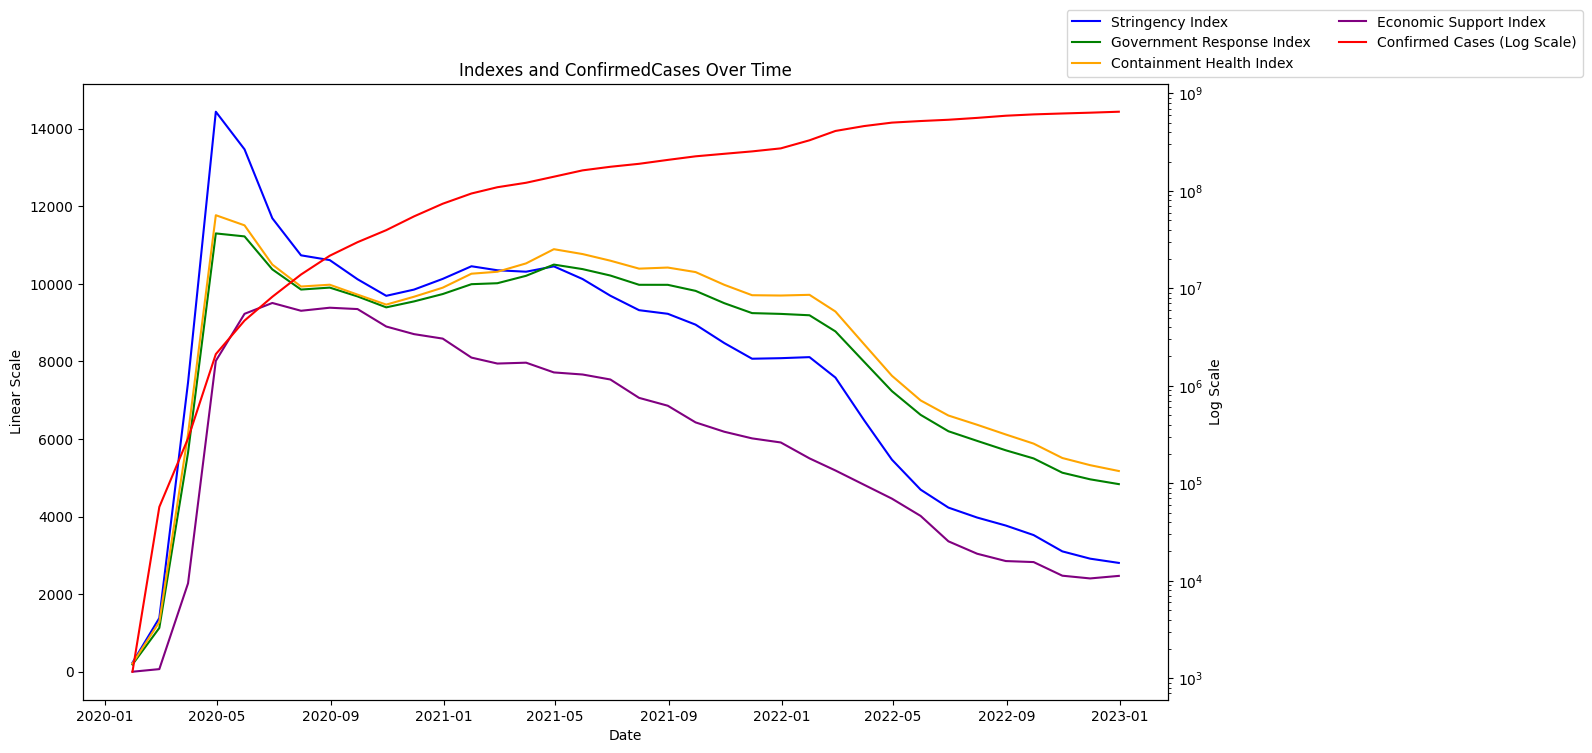

In [143]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

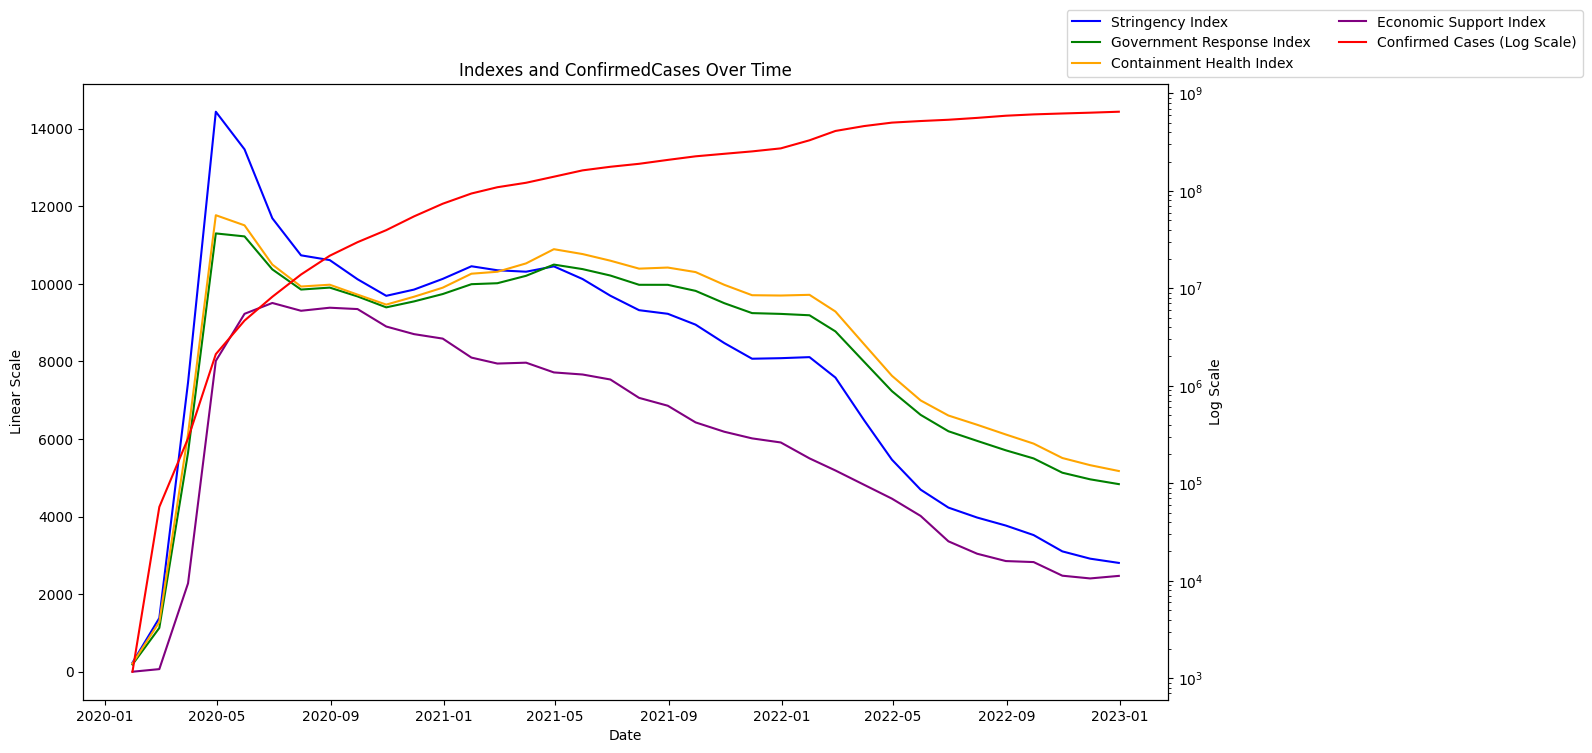

In [144]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

### EDA 2

In [145]:
aggregation_funcs_for_clustering = {}

for column in df.columns:
    if column == 'CountryCode' or pd.api.types.is_datetime64_dtype(df[column]):
      continue
    elif pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs_for_clustering[column] = 'count'
    else:
      aggregation_funcs_for_clustering[column] = 'sum'

In [148]:
df

CountryCode       Date  C1M  C2M  C3M  C4M  C5M  C6M  C7M  C8EV   E1  \
75             ABW 2020-03-16  3.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   
76             ABW 2020-03-17  3.0  0.0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   
77             ABW 2020-03-18  3.0  0.0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   
78             ABW 2020-03-19  3.0  0.0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   
79             ABW 2020-03-20  3.0  0.0  0.0  0.0  0.0  0.0  0.0   4.0  0.0   
...            ...        ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
200563         ZWE 2022-12-27  1.0  2.0  1.0  0.0  0.0  0.0  0.0   1.0  0.0   
200564         ZWE 2022-12-28  1.0  2.0  1.0  0.0  0.0  0.0  0.0   1.0  0.0   
200565         ZWE 2022-12-29  1.0  2.0  1.0  0.0  0.0  0.0  0.0   1.0  0.0   
200566         ZWE 2022-12-30  1.0  2.0  1.0  0.0  0.0  0.0  0.0   1.0  0.0   
200567         ZWE 2022-12-31  1.0  2.0  1.0  0.0  0.0  0.0  0.0   1.0  0.0   

        E1_Flag   E2   E3   E4   H1   H2   H3   H4   H5  H6M   H7  H7_Flag  \
75          NaN  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      NaN   
76          NaN  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      NaN   
77          NaN  0.0  0.0  0.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0      NaN   
78          NaN  0.0  0.0  0.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0      NaN   
79          NaN  0.0  0.0  0.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0      NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
200563      NaN  0.0  NaN  NaN  2.0  3.0  1.0  NaN  0.0  3.0  5.0      1.0   
200564      NaN  0.0  NaN  NaN  2.0  3.0  1.0  NaN  0.0  3.0  5.0      1.0   
200565      NaN  0.0  NaN  NaN  2.0  3.0  1.0  NaN  0.0  3.0  5.0      1.0   
200566      NaN  0.0  NaN  NaN  2.0  3.0  1.0  NaN  0.0  3.0  5.0      1.0   
200567      NaN  0.0  NaN  NaN  2.0  3.0  1.0  NaN  0.0  3.0  5.0      1.0   

        H8M  V1  V2A       V2B       V2C  V2D  V2E_Education  V2F  V2G  V3  \
75      0.0   0    0       NaN       NaN  NaN            NaN  NaN  NaN   0   
76      0.0   0    0       NaN       NaN  NaN            NaN  NaN  NaN   0   
77      1.0   0    0       NaN       NaN  NaN            NaN  NaN  NaN   0   
78      1.0   0    0       NaN       NaN  NaN            NaN  NaN  NaN   0   
79      1.0   0    0       NaN       NaN  NaN            NaN  NaN  NaN   0   
...     ...  ..  ...       ...       ...  ...            ...  ...  ...  ..   
200563  0.0   2    3  5-15 yrs  5-15 yrs  2.0            2.0  2.0  2.0   5   
200564  0.0   2    3  5-15 yrs  5-15 yrs  2.0            2.0  2.0  2.0   5   
200565  0.0   2    3  5-15 yrs  5-15 yrs  2.0            2.0  2.0  2.0   5   
200566  0.0   2    3  5-15 yrs  5-15 yrs  2.0            2.0  2.0  2.0   5   
200567  0.0   2    3  5-15 yrs  5-15 yrs  2.0            2.0  2.0  2.0   5   

         V4  ConfirmedCases  ConfirmedDeaths MajorityVaccinated  \
75      NaN             2.0              0.0                 NV   
76      NaN             3.0              0.0                 NV   
77      NaN             4.0              0.0                 NV   
78      NaN             4.0              0.0                 NV   
79      NaN             5.0              0.0                 NV   
...     ...             ...              ...                ...   
200563  1.0        259981.0           5637.0                 NV   
200564  1.0        259981.0           5637.0                 NV   
200565  1.0        259981.0           5637.0                 NV   
200566  1.0        259981.0           5637.0                 NV   
200567  1.0        259981.0           5637.0                 NV   

        PopulationVaccinated  StringencyIndex_Average  \
75                      0.00                    11.11   
76                      0.00                    22.22   
77                      0.00                    33.33   
78                      0.00                    33.33   
79                      0.00                    33.33   
...                      ...         

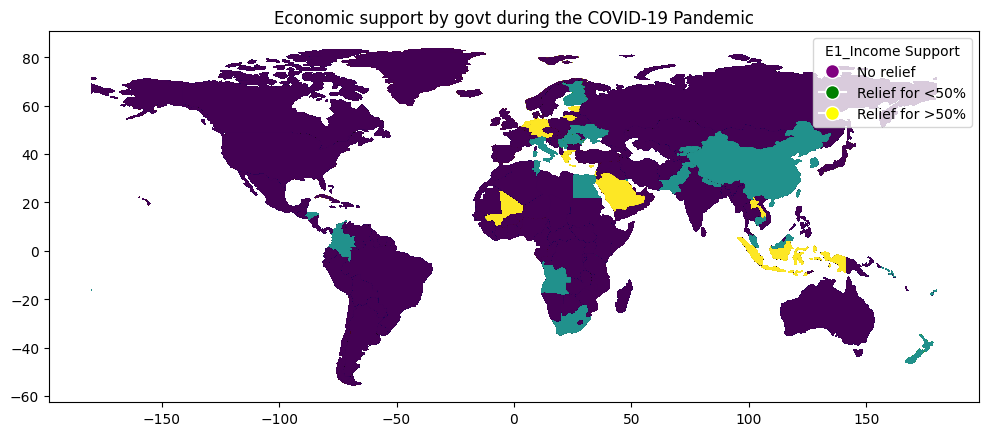

In [153]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(df, left_on='iso_a3', right_on='CountryCode')


fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='E1', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No relief', 1: 'Relief for <50%', 2: 'Relief for >50%'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='E1_Income Support')

ax.set_title('Economic support by govt during the COVID-19 Pandemic')
plt.show()


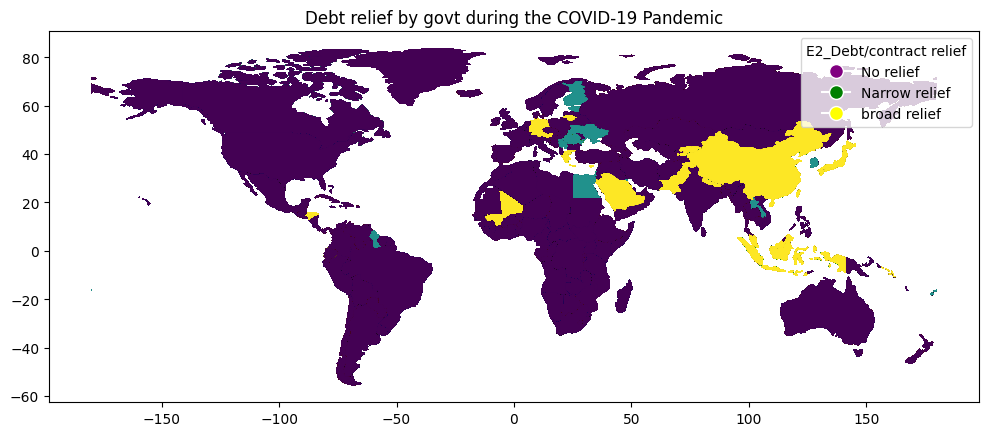

In [156]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='E2', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No relief', 1: 'Narrow relief', 2: 'broad relief'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='E2_Debt/contract relief')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

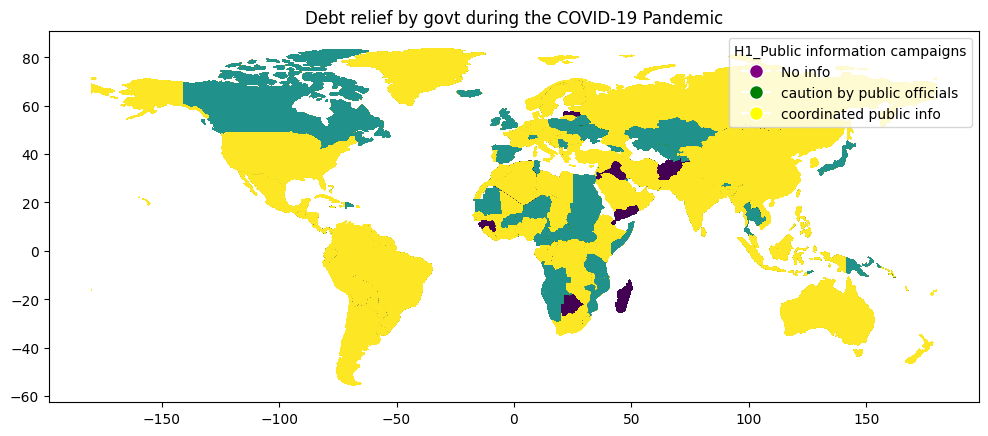

In [157]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H1', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No info', 1: 'caution by public officials', 2: 'coordinated public info'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='H1_Public information campaigns')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

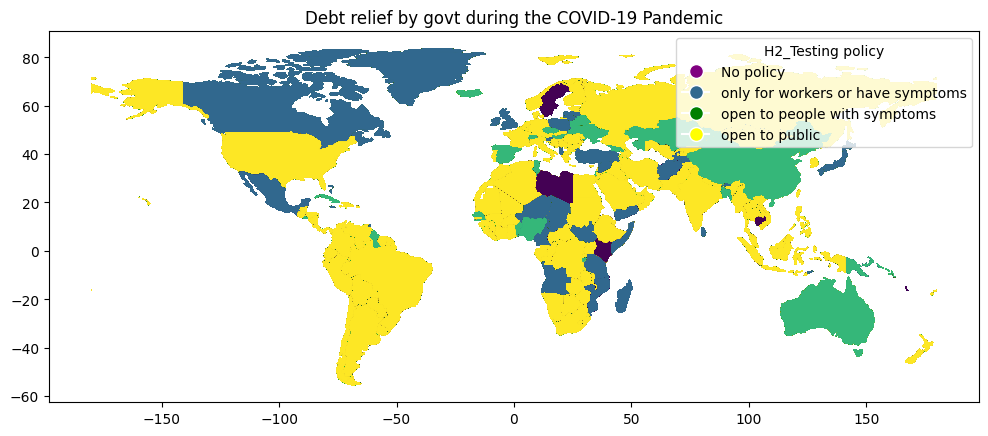

In [159]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H2', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No policy', 1: 'only for workers or have symptoms', 2: 'open to people with symptoms', 3: 'open to public'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#31688e'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='H2_Testing policy')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

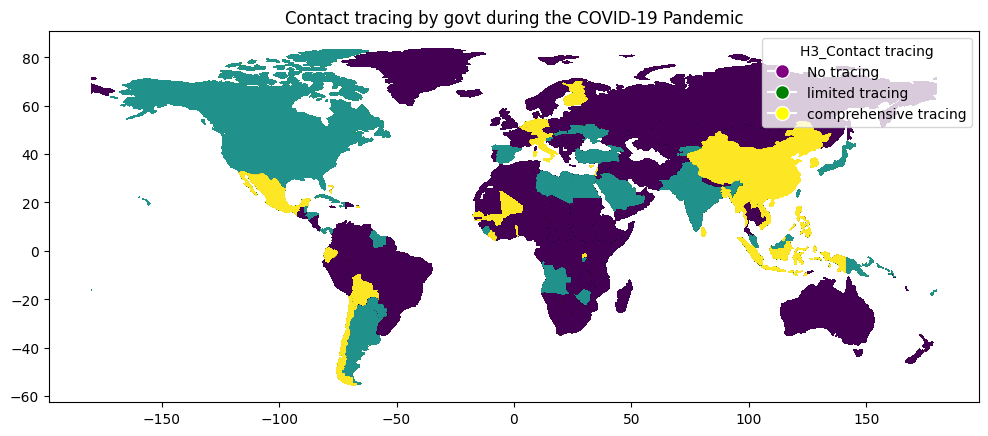

In [160]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H3', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No tracing', 1: 'limited tracing', 2: 'comprehensive tracing'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow'),]
ax.legend(handles, labels.values(), title='H3_Contact tracing')

ax.set_title('Contact tracing by govt during the COVID-19 Pandemic')
plt.show()

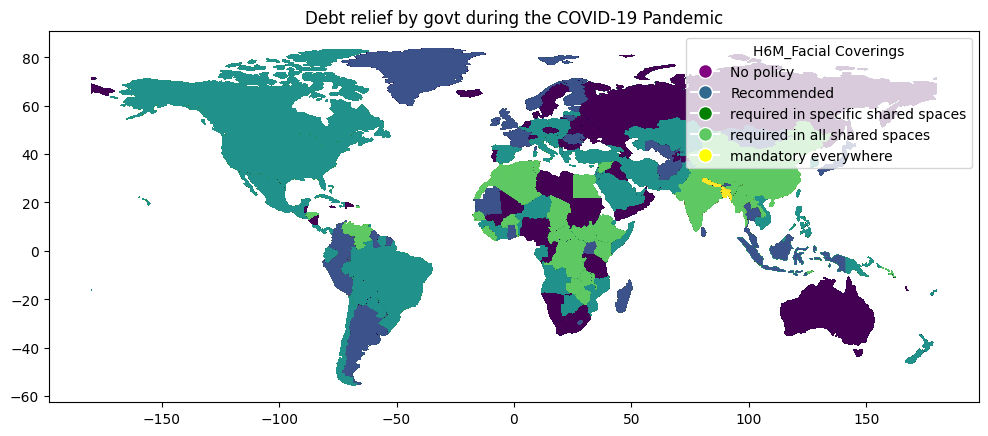

In [161]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H6M', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No policy', 1: 'Recommended', 2: 'required in specific shared spaces', 3: 'required in all shared spaces', 4: 'mandatory everywhere'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#31688e'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#5ec962'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='H6M_Facial Coverings')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

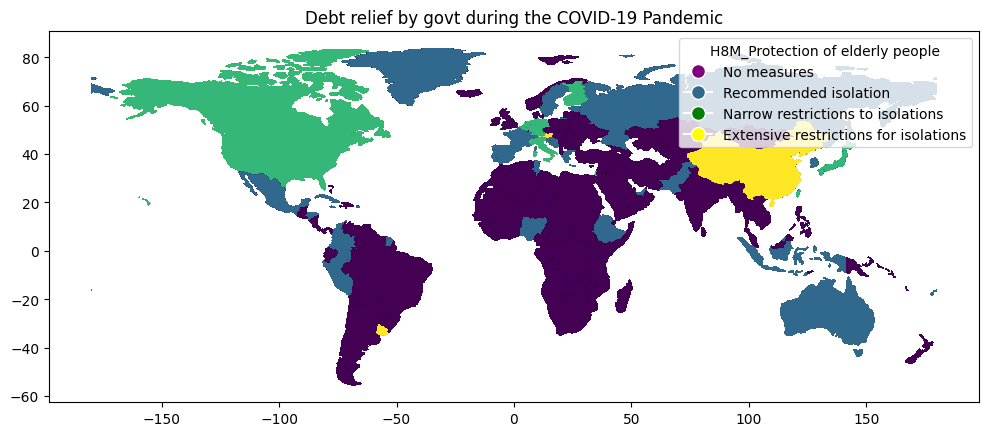

In [163]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H8M', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No measures', 1: 'Recommended isolation', 2: 'Narrow restrictions to isolations', 3: 'Extensive restrictions for isolations'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#31688e'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='H8M_Protection of elderly people')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()